# <center><h1><b>Introduction</b></h1></center>
<p>
Gliomas represent the most prevalent primary brain tumors and are categorized as either LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme) based on histological and imaging criteria. The grading process is significantly influenced by both clinical and molecular/mutation factors. However, molecular tests, although valuable for precise diagnosis, can be costly for glioma patients.
Within our dataset, we have focused on the 20 most frequently mutated genes and three clinical features extracted from the TCGA-LGG and TCGA-GBM brain glioma projects.

Our objective is to identify the key variables that can effectively indicate the early signs of LGG (Lower-Grade Glioma).
</p>

# <center><h1><b>Analysis</b></h1></center>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme)
#The Cancer Genome Atlas.
df = pd.read_csv('TCGA_GBM_LGG_Mutations_all.csv',header = 0)

In [3]:
df.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


<p>
    We are filtering two 'Grade' column values such as LGG and GBM. We are also removing irrelevant values from 'Gender' column '--'.
</p>

In [4]:
#Taking Grade either as 'LGG' or 'GBM'
dataset = df[(df['Grade'] == 'LGG') | (df['Grade'] == 'GBM')]
#Removing dataset where Gender is '--'
dataset = dataset[dataset['Gender']!='--']

<p>
    We are converting 'Gender' column 0 for 'Female' and 1 and 'Male'. We are also converting 'Grase' column 0 for 'GBM' and 1 and 'LGG'.
</p>

In [5]:
#Convert Gender column in binary format
dataset['Gender'] = dataset['Gender'].map(lambda x: 0 if x in 'Female'else 1)
#Convert Grade column in binary format 0 for GBM and 1 for LGG
dataset['Grade'] = dataset['Grade'].map(lambda x: 0 if x in 'GBM'else 1)

<p>
    We are converting 'Age_in_diagonis' column from string data type to 'Age_in_years' column into numerical data type.
</p>

In [6]:
#=======================Converting age in years (numerical) value=========================================
def age_in_years(age):
    words = age.split()
    #Initialize variables to store the years and days
    years = 0
    days = 0
    # Loop through the words and extract the years and days
    for i in range(len(words)):
        if words[i] == "years":
            years = int(words[i - 1])
        elif words[i] == "days":
            days = int(words[i - 1])
    # Convert the days into years (assuming 365 days in a year)
    years += days / 365
    return years
#==========================================================================================================

In [7]:
#Applying 'age_in_years' function for 'Age_in_years' column.
dataset['Age_in_years'] = dataset['Age_at_diagnosis'].apply(age_in_years)

In [8]:
#Create age column if age is less than the average years of patient 0 else 1
dataset['Age'] = dataset['Age_in_years'].map(lambda x: 0 if x < dataset['Age_in_years'].mean() else 1)

In [9]:
#Dropping columns which cannot be used for Predictive Model
dataset.drop(columns = ['Age_at_diagnosis','Project','Case_ID','Primary_Diagnosis'],axis = 1, inplace = True)

In [10]:
#==========Creating a method to convert the String values 'MUTATED' to 1 and 'NOT_MUTATED' to 0========
def binary_conversion(data):
    if data == 'MUTATED':
        return 1
    else:
        return 0
#======================================================================================================

In [11]:
#===========Applying binary_conversion method to 20 attributes containing genes related information========
dataset['IDH1'] = dataset['IDH1'].map(binary_conversion)
dataset['TP53'] = dataset['TP53'].map(binary_conversion)
dataset['ATRX'] = dataset['ATRX'].map(binary_conversion)
dataset['PTEN'] = dataset['PTEN'].map(binary_conversion)
dataset['EGFR'] = dataset['EGFR'].map(binary_conversion)
dataset['CIC'] = dataset['CIC'].map(binary_conversion)
dataset['MUC16'] = dataset['MUC16'].map(binary_conversion)
dataset['PIK3CA'] = dataset['PIK3CA'].map(binary_conversion)
dataset['NF1'] = dataset['NF1'].map(binary_conversion)
dataset['PIK3R1'] = dataset['PIK3R1'].map(binary_conversion)
dataset['FUBP1'] = dataset['FUBP1'].map(binary_conversion)
dataset['RB1'] = dataset['RB1'].map(binary_conversion)
dataset['NOTCH1'] = dataset['NOTCH1'].map(binary_conversion)
dataset['BCOR'] = dataset['BCOR'].map(binary_conversion)
dataset['CSMD3'] = dataset['CSMD3'].map(binary_conversion)
dataset['SMARCA4'] = dataset['SMARCA4'].map(binary_conversion)
dataset['GRIN2A'] = dataset['GRIN2A'].map(binary_conversion)
dataset['IDH2'] = dataset['IDH2'].map(binary_conversion)
dataset['FAT4'] = dataset['FAT4'].map(binary_conversion)
dataset['PDGFRA'] = dataset['PDGFRA'].map(binary_conversion)
#==========================================================================================================

In [12]:
#=================Removing 'not reported' value from Race column====================
dataset = dataset[dataset['Race']!='not reported']
#===================================================================================

In [13]:
#=====================Create dummy variables for Race column=======================
dataset = pd.get_dummies(dataset, columns=['Race'])
#==================================================================================

In [14]:
dataset.head()

,Grade,Gender,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,GRIN2A,IDH2,FAT4,PDGFRA,Age_in_years,Age,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,51.295890,1,False,False,False,True
1,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,38.715068,0,False,False,False,True
2,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,35.169863,0,False,False,False,True
3,1,0,1,1,1,0,0,0,1,0,...,0,0,1,0,32.775342,0,False,False,False,True
4,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,31.512329,0,False,False,False,True


In [15]:
#==================================Renaming multiple columns===============================================
dataset = dataset.rename(columns={'Race_american indian or alaska native': 'NativeAmerican', 'Race_black or african american': 'AfricanAmerican'})

<p>
    Based on the correlation plot "IDH1" has a high <b>Positive correlation</b> (0.708432) with "Grade," it indicates that higher values of "IDH1" are strongly associated with higher-grade conditions. Conversely, if "Age" has a high <b>Negative correlation</b> (-0.472121) with "Grade," it means that increasing age is strongly associated with lower-grade conditions
</p>

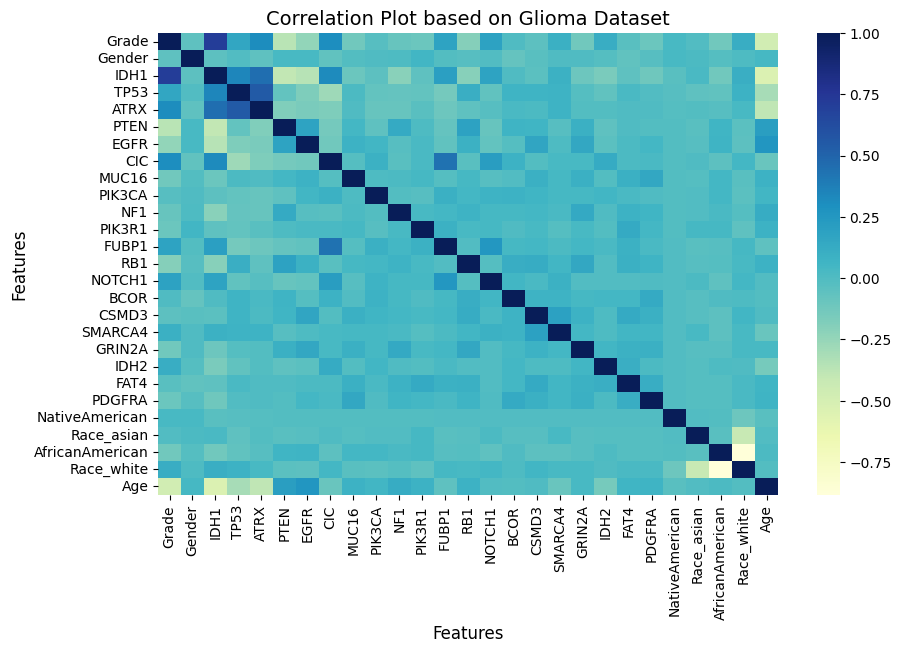

In [50]:
#========================Creating correlation matrix for the Glioma datastet==================================
columns = ['Grade', 'Gender', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR',
       'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA',
       'NativeAmerican', 'Race_asian', 'AfricanAmerican', 'Race_white', 'Age']

correlation_matrix = dataset[columns].corr()
# Create a correlation plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(correlation_matrix, cmap='YlGnBu')
# Add plot title and adjust font size
plt.title('Correlation Plot based on Glioma Dataset', fontsize=14)
# Set the font size of the axis labels
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Show the plot
plt.show()
#==========================================================================================================

In [52]:
correlation_matrix.to_csv('corr.csv')

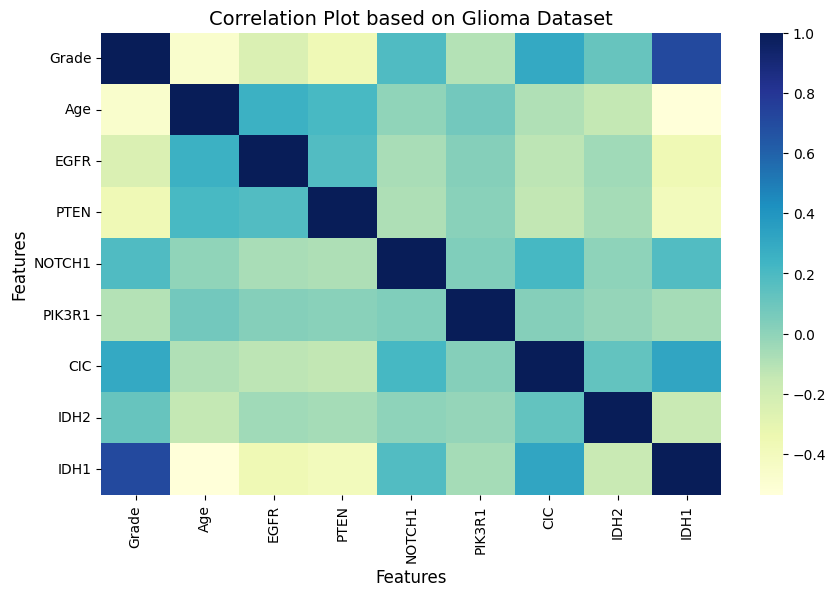

In [48]:
columns = ['Grade', 'Age','EGFR', 'PTEN', 'NOTCH1', 'PIK3R1', 'CIC', 'IDH2', 'IDH1']

correlation_matrix = dataset[columns].corr()
# Create a correlation plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(correlation_matrix, cmap='YlGnBu')
# Add plot title and adjust font size
plt.title('Correlation Plot based on Glioma Dataset', fontsize=14)
# Set the font size of the axis labels
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Show the plot
plt.show()

In [17]:
#======================Import library to split the dataset into train and test data, GridSearchCV===========
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
#Importing KNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#importing accuracy score
from sklearn.metrics import accuracy_score
#importing time
import time
#importing classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
#==========================================================================================================

In [18]:
Kf = dataset.drop(['Age_in_years'], axis = 1)
Kf.head()

,Grade,Gender,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Age,NativeAmerican,Race_asian,AfricanAmerican,Race_white
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,False,False,False,True
1,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,False,False,False,True
2,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
3,1,0,1,1,1,0,0,0,1,0,...,0,0,0,1,0,0,False,False,False,True
4,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True


In [19]:
Kf.to_csv('Kf.csv')

In [21]:
X.head()

,Gender,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,...,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Age,NativeAmerican,Race_asian,AfricanAmerican,Race_white
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,False,False,False,True
1,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,False,False,False,True
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
3,0,1,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,False,False,False,True
4,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True


In [19]:
#==================Predictor Variables=====================================
X = dataset.drop(['Grade','Age_in_years'], axis = 1)
#===================Output Variable========================================
Y = dataset['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [20]:
#=================Logistic Regression Model================================================================
clf_LR = LogisticRegression(solver='lbfgs', max_iter=1000)
# Start the timer
start_time = time.time()
# Fitting the classifier to the training data
clf_LR.fit(X_train, y_train)
# Stop the timer
end_time = time.time()
# Making predictions on the testing data
y_pred_LR = clf_LR.predict(X_test)
# Calculate the execution time
execution_time = end_time - start_time
# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_LR)
print("Logistic Regression Accuracy:", accuracy)
print(f"Excecution Time: {execution_time} seconds")

Logistic Regression Accuracy: 0.8809523809523809
Excecution Time: 0.021866321563720703 seconds


<p>
    The value <b>0.8809523809523809</b>, expressed as a percentage, indicates that the logistic regression model's predictions are approximately <b>88.10%</b> accurate in explaining the variance in the target variable. The execution time is approximately <b>0.03546476364135742</b> seconds, which is a very short duration.
</p>

<p>
    For <b>class 0</b>: Precision is <b>0.81</b>. Out of all instances predicted as <b>class 0</b>, <b>81%</b> were correctly classified as <b>class 0</b>. For <b>class 1</b>: Precision is <b>0.95</b>. Out of all instances predicted as <b>class 1</b>, <b>95%</b> were correctly classified as class 1.
    For <b>class 0</b>: Precision is 0.81. Out of all instances predicted as class 0, 81% were correctly classified as class 0. For class 1: Precision is 0.95. Out of all instances predicted as class 1, 95% were correctly classified as class 1. For class 0: F1-score is 0.87, indicating a balance between precision and recall for class 0. For class 1: F1-score is 0.89, indicating a balance between precision and recall for class 1. The accuracy for this model is 0.88, or 88%, which means that 88% of the instances in the dataset were correctly classified.
 </p>

In [22]:
#=======================Classification Report based on Logistic Regression====================(By Abhishek)
report_LR = classification_report(y_test, y_pred_LR)
print(report_LR)
#=================================================================================================

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       107
           1       0.95      0.84      0.89       145

    accuracy                           0.88       252
   macro avg       0.88      0.89      0.88       252
weighted avg       0.89      0.88      0.88       252



In [23]:
#============================Hyper-parameter tuning for Logistic Regression==============================
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l2']}
grid_search = GridSearchCV(clf_LR, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")
#=======================================================================================================

Best hyperparameters: {'C': 1, 'penalty': 'l2'}


In [24]:
best_logistic_reg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], max_iter=10000)
best_logistic_reg.fit(X_train, y_train)
accuracy = best_logistic_reg.score(X_test, y_test)
print(f"Model accuracy with best hyperparameters: {accuracy}")

Model accuracy with best hyperparameters: 0.8809523809523809


<p>
    The analysis suggests that the model, likely a logistic regression model due to the 'penalty' hyperparameter, has been fine-tuned with the <b>'C'</b> and <b>'penalty'</b> hyperparameters. The combination of <b>'C = 1'</b> and <b>'penalty = 'l2'</b> resulted in the best model performance, achieving an accuracy of approximately <b>88.1%</b>.
</p>

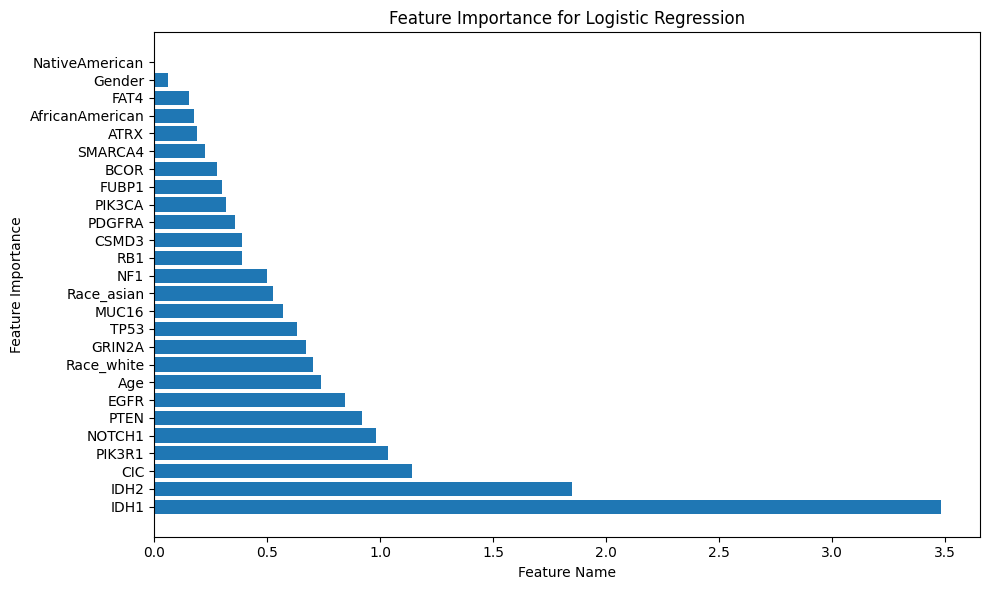

In [25]:
#======================Feature Importance based on Logistic Regression=========================================================================
# Create a figure and a set of subplots
# Get the coefficients
coefficients = clf_LR.coef_[0]

# Sort the coefficients by absolute value
sorted_coefficients = sorted(zip(X.columns, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Create the feature importance graph
feature_names = [x[0] for x in sorted_coefficients]
feature_importances = [abs(x[1]) for x in sorted_coefficients]
plt.figure(figsize=(10, 6))
plt.barh(feature_names,feature_importances)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Logistic Regression')
plt.tight_layout()
plt.show()
#==========================================================================================================

<p>
    <b>"IDH1"</b> has a positive coefficient of approximately <b>3.480</b>. This suggests that an increase in the "IDH1" feature is associated with a significant positive impact on the model's predictions.
    <b>"PIK3R1"</b> has a negative coefficient of approximately <b>-1.034</b>. This implies that an increase in the "PIK3R1" feature has a negative influence on the model's predictions.
</p>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc

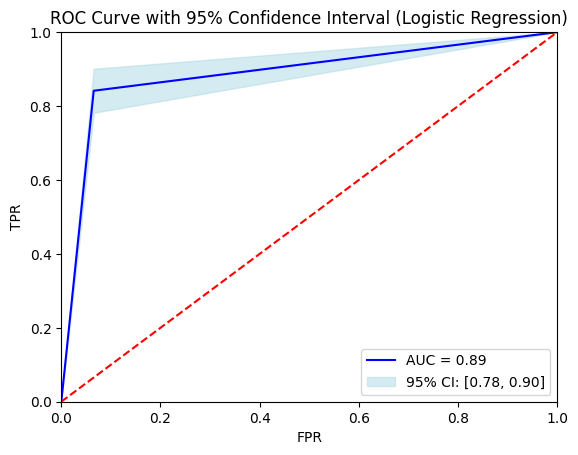

In [24]:
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_LR)
roc_auc = auc(fpr, tpr)

# Calculate the standard error for the TPR (True Positive Rate)
# Standard error formula for TPR
std_err = np.sqrt((tpr * (1 - tpr)) / y_test.sum())

# Compute the confidence interval
confidence_level = 0.95
z_score = 1.96  # corresponds to a 95% confidence interval
upper_bound = tpr + std_err * z_score
lower_bound = tpr - std_err * z_score

# Plot the ROC curve with confidence interval
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,
                 label=f'95% CI: [{lower_bound[1]:.2f}, {upper_bound[1]:.2f}]')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve with 95% Confidence Interval (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

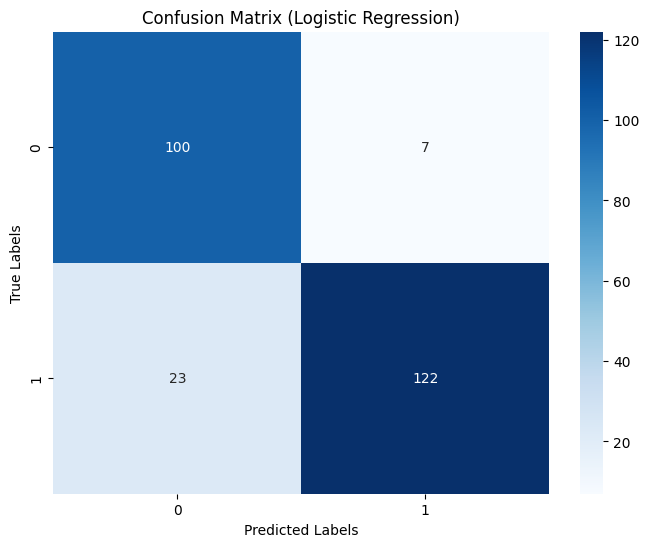

In [25]:
#=============================Calculate the confusion matrix on Logistic Regression========================
cm = confusion_matrix(y_test, y_pred_LR)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()
#=======================================================================================================

<p>
    <b>True Positives (TP)</b>: 100 instances were correctly predicted as positive.
    <b>False Negatives (FN)</b>: 7 instances were incorrectly predicted as negative, but they are actually positive.
    <b>False Positives (FP)</b>: 23 instances were incorrectly predicted as positive, but they are actually negative.
    <b>True Negatives (TN)</b>: 122 instances were correctly predicted as negative.
</p>

In [26]:
#==============================Import Random Forest Classifier=========================================
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 300, max_depth = 10,  min_samples_split = 10)
# Start the timer
start_time = time.time()
# Fitting the classifier to the training data
clf_RF.fit(X_train, y_train)
# Making predictions on the testing data
y_pred_RF = clf_RF.predict(X_test)
# Stop the timer
end_time = time.time()
# Calculate the execution time
execution_time = end_time - start_time
# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_RF)
print("Random Forest Accuracy:", accuracy)
print(f"Excecution Time: {execution_time} seconds")
#======================================================================================================

Random Forest Accuracy: 0.876984126984127
Excecution Time: 0.5421237945556641 seconds


<p>
    An accuracy of <b>0.877</b> indicates that the Random Forest model correctly predicted the target variable for about <b>87.7%</b> of the instances in the dataset.The execution time is approximately <b>0.516</b> seconds.
</p>

In [27]:
#=========================Hyper-parameter Tuning of Random Forest=========================================
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(estimator=clf_RF, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, Y)
print("Best Hyperparameters: ", grid_search.best_params_)
#==========================================================================================================

Best Hyperparameters:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [28]:
#======================Best Accuracy=============================
print("Best Accuracy: ", grid_search.best_score_)
#================================================================

Best Accuracy:  0.8761904761904763


<p>
<b>Best Hyperparameters</b>
    <ul>
        <li>max_depth: The maximum depth of each decision tree in the random forest is set to 10.</li>
        <li>min_samples_split: The minimum number of samples required to split an internal node is set to 10.</li>
        <li>n_estimators: The number of decision trees in the random forest is set to 300.</li>
    </ul>
   The model's accuracy with the best hyperparameters is approximately <b>0.874, or 87.4%</b>
</p>

In [36]:
#=======================Classification Report based on Random Forest====================(By Abhishek)
report_RF = classification_report(y_test, y_pred_RF)
print(report_RF)
#=================================================================================================

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.94      0.83      0.88       145

    accuracy                           0.87       252
   macro avg       0.87      0.88      0.87       252
weighted avg       0.88      0.87      0.87       252



<p>
    For class 0: Precision is 0.80. Out of all instances predicted as class 0, 80% were correctly classified as class 0. For class 1: Precision is 0.94. Out of all instances predicted as class 1, 94% were correctly classified as class 1. For class 0: Recall is 0.93. Out of all actual class 0 instances, 93% were correctly predicted as class 0. For class 1: Recall is 0.83. Out of all actual class 1 instances, 83% were correctly predicted as class 1. The accuracy for this model is 0.87, or 87%, which means that 87% of the instances in the dataset were correctly classified.
</p>

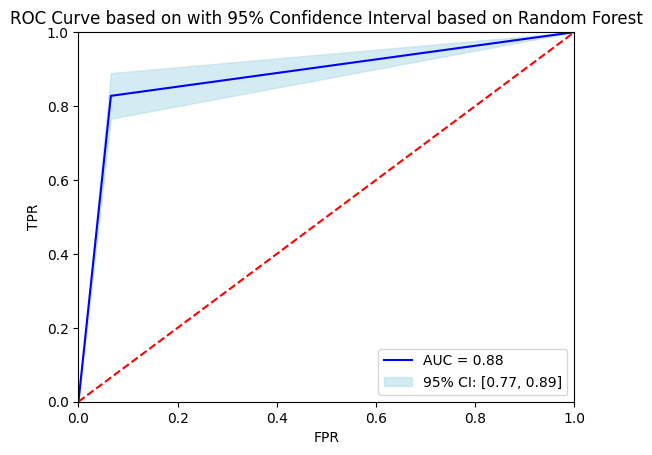

In [37]:
#=================Plotting ROC curve based on Random Forest====================(By Abhishek)
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF)
roc_auc = auc(fpr, tpr)

# Calculate the standard error for the TPR (True Positive Rate)
# Standard error formula for TPR
std_err = np.sqrt((tpr * (1 - tpr)) / y_test.sum())

# Compute the confidence interval
confidence_level = 0.95
z_score = 1.96  # corresponds to a 95% confidence interval
upper_bound = tpr + std_err * z_score
lower_bound = tpr - std_err * z_score

# Plot the ROC curve with confidence interval
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,
                 label=f'95% CI: [{lower_bound[1]:.2f}, {upper_bound[1]:.2f}]')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve based on with 95% Confidence Interval based on Random Forest')
plt.legend(loc='lower right')
plt.show()
#====================================================================================================

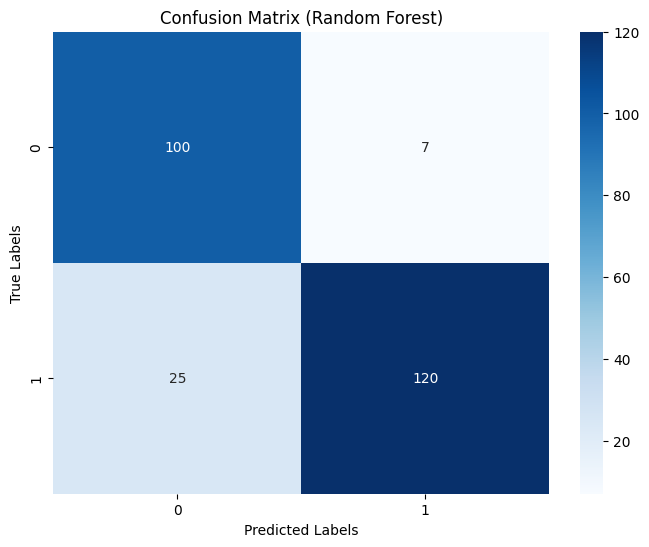

In [38]:
#=======================Calculate the confusion matrix for Random Forest====================================
cm = confusion_matrix(y_test, y_pred_RF)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Random Forest)')
plt.show()
#==========================================================================================================

<p>
    The model correctly identified <b>121</b> instances as positive <b>(class 1)</b>. The model correctly identified <b>100</b> instances as negative <b>(class 0)</b>. The model made <b>7</b> false positive errors, incorrectly classifying negative instances as positive. The model made <b>24</b> false negative errors, incorrectly classifying positive instances as negative.
</p>

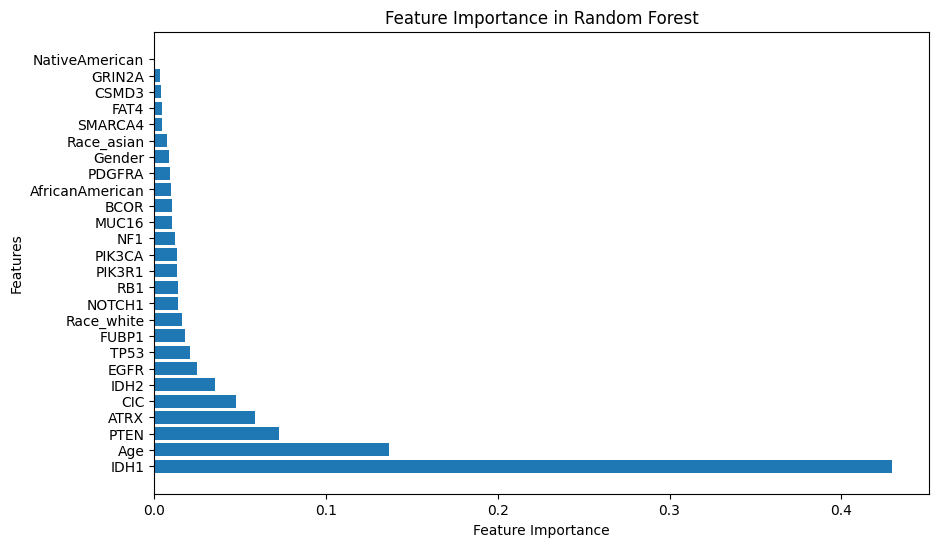

In [39]:
#=======================Feature Importance based on Random Forest Classifier===============================
feature_importances = clf_RF.feature_importances_
# Create a DataFrame to visualize the importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()
#==========================================================================================================

<p>
    <b>IDH1</b> feature has the highest importance score, with a value of approximately <b>42.48%</b>. This suggests that IDH1 is the most influential feature in the model's decision-making process. <b>Age:</b> Age is the second most important feature, with an importance score of approximately <b>14.61%</b>.
</p>

In [40]:
#==========================Import Support Vector Machine Library============================================
from sklearn.svm import SVC
clf_SVM = SVC(kernel='sigmoid', probability=True, C = 100, gamma='auto')
# Start the timer
start_time = time.time()
# Fitting the classifier to the training data
clf_SVM.fit(X_train, y_train)
# Stop the timer
end_time = time.time()
# Making predictions on the testing data
y_pred_SVM = clf_SVM.predict(X_test)
# Calculate the execution time
execution_time = end_time - start_time
# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_SVM)
print("SVM Accuracy:", accuracy)
print(f"Excecution Time: {execution_time} seconds")
#=======================================================================================================

SVM Accuracy: 0.873015873015873
Excecution Time: 0.12134790420532227 seconds


<p>
    In this case, the SVM model achieved an accuracy of approximately 87.30%. This means that about 87.30% of the instances in the dataset were correctly classified by the SVM model. The time is measured in seconds. In this case, the SVM model took approximately 0.077 seconds (or 77.47 milliseconds) to complete the specified task
    </p>

In [41]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
}
grid_search = GridSearchCV(estimator=clf_SVM, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy CV:", accuracy)
print("Best Params:", best_params)
print("Best Estimator:", best_model)

SVM Accuracy CV: 0.873015873015873
Best Params: {'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}
Best Estimator: SVC(C=100, gamma='auto', kernel='sigmoid', probability=True)


In [42]:
#=======================Classification Report based on Support Vector Machine=================(By Abhishek)
report_SVM = classification_report(y_test, y_pred_SVM)
print(report_SVM)
#=================================================================================================

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.94      0.83      0.88       145

    accuracy                           0.87       252
   macro avg       0.87      0.88      0.87       252
weighted avg       0.88      0.87      0.87       252



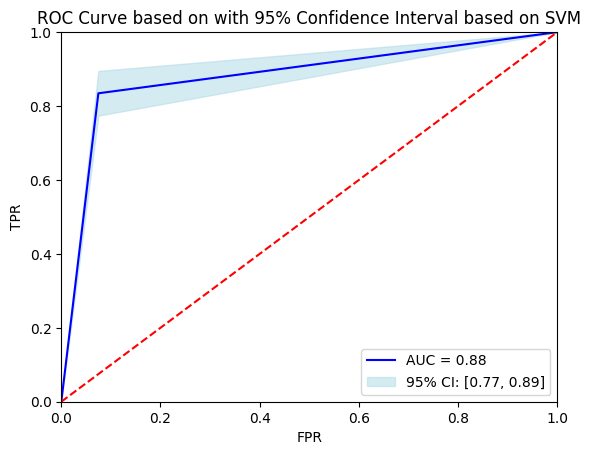

In [43]:
#=================Plotting ROC curve based on Support Vector Machine====================(By Abhishek)
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_SVM)
roc_auc = auc(fpr, tpr)

# Calculate the standard error for the TPR (True Positive Rate)
# Standard error formula for TPR
std_err = np.sqrt((tpr * (1 - tpr)) / y_test.sum())

# Compute the confidence interval
confidence_level = 0.95
z_score = 1.96  # corresponds to a 95% confidence interval
upper_bound = tpr + std_err * z_score
lower_bound = tpr - std_err * z_score

# Plot the ROC curve with confidence interval
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,
                 label=f'95% CI: [{lower_bound[1]:.2f}, {upper_bound[1]:.2f}]')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve based on with 95% Confidence Interval based on SVM')
plt.legend(loc='lower right')
plt.show()
#====================================================================================================

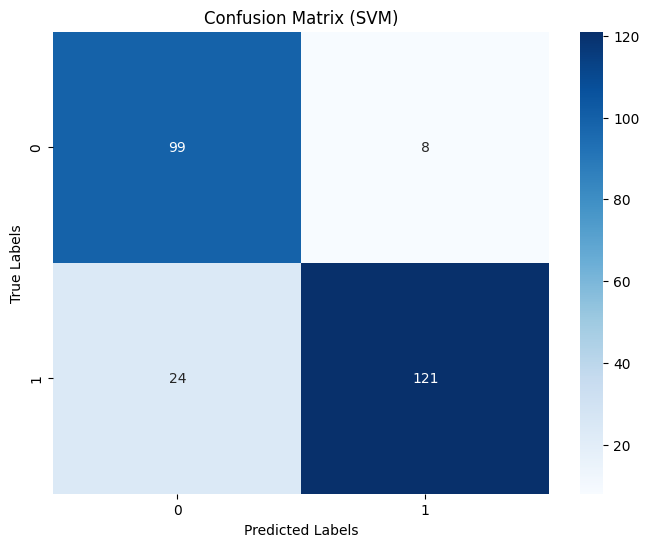

In [44]:
#=======================Calculate the confusion matrix for Confusion Matrix====================================
cm = confusion_matrix(y_test, y_pred_SVM)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SVM)')
plt.show()
#==========================================================================================================

<p>
    The model correctly identified 121 instances as positive (class 1). The model correctly identified 99 instances as negative (class 0). The model made 8 false positive errors, incorrectly classifying negative instances as positive. The model made 24 false negative errors, incorrectly classifying positive instances as negative.
</p>

In [45]:
#================================Importing Adaptive Boosting Classifier library============================
from sklearn.ensemble import AdaBoostClassifier
clf_AB = AdaBoostClassifier(clf_RF, n_estimators=10, learning_rate=1)
# Start the timer
start_time = time.time()
# Fitting the classifier to the training data
clf_AB.fit(X_train, y_train)
# Stop the timer
end_time = time.time()
# Making predictions on the testing data
y_pred_AB = clf_RF.predict(X_test)
# Calculate the execution time
execution_time= end_time - start_time
# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_AB)
print("AdaBoost Accuracy:", accuracy)
print(f"Excecution Time: {execution_time} seconds")
#==========================================================================================================

AdaBoost Accuracy: 0.873015873015873
Excecution Time: 4.684724807739258 seconds


<p>
    The AdaBoost model achieved an accuracy of approximately 87.30%. In this case, the AdaBoost model took approximately 5.878 seconds to complete the specified task.
   </p>

In [46]:
#=======================Classification Report based on AdaBoost Classifier====================(By Abhishek)
report_AB = classification_report(y_test, y_pred_AB)
print(report_AB)
#======================================================================================================

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.94      0.83      0.88       145

    accuracy                           0.87       252
   macro avg       0.87      0.88      0.87       252
weighted avg       0.88      0.87      0.87       252



<p>
    In this report, for class 1, the <b>precision</b> is 0.94, indicating that 94% of the instances predicted as class 1 were actually class 1. For class 0, the precision is 0.80, meaning that 80% of the instances predicted as class 0 were actually class 0.
    
In this report, for class 1, the <b>recall</b> is 0.83, indicating that 83% of the actual class 1 instances were correctly classified as class 1. For class 0, the recall is 0.93, meaning that 93% of the actual class 0 instances were correctly classified as class 0.

For class 1, the F1-score is 0.88, and for class 0, the F1-score is 0.86.
</p>

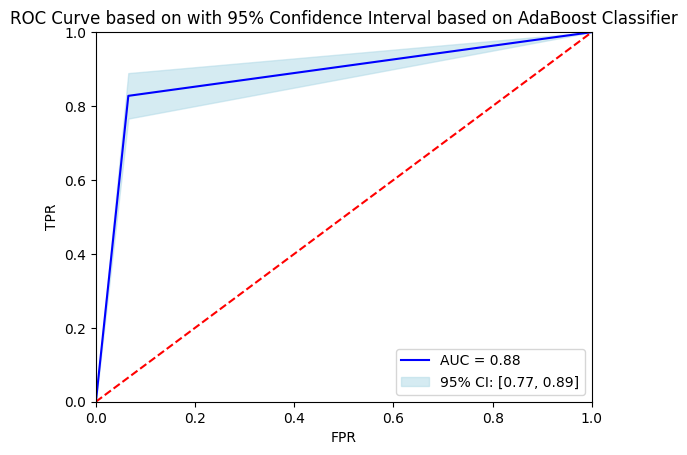

In [47]:
#=================Plotting ROC curve based on AdaBoost Classifier====================(By Abhishek)
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_AB)
roc_auc = auc(fpr, tpr)
# Standard error formula for TPR
std_err = np.sqrt((tpr * (1 - tpr)) / y_test.sum())

# Compute the confidence interval
confidence_level = 0.95
z_score = 1.96  # corresponds to a 95% confidence interval
upper_bound = tpr + std_err * z_score
lower_bound = tpr - std_err * z_score

# Plot the ROC curve with confidence interval
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,
                 label=f'95% CI: [{lower_bound[1]:.2f}, {upper_bound[1]:.2f}]')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve based on with 95% Confidence Interval based on AdaBoost Classifier')
plt.legend(loc='lower right')
plt.show()
#====================================================================================================

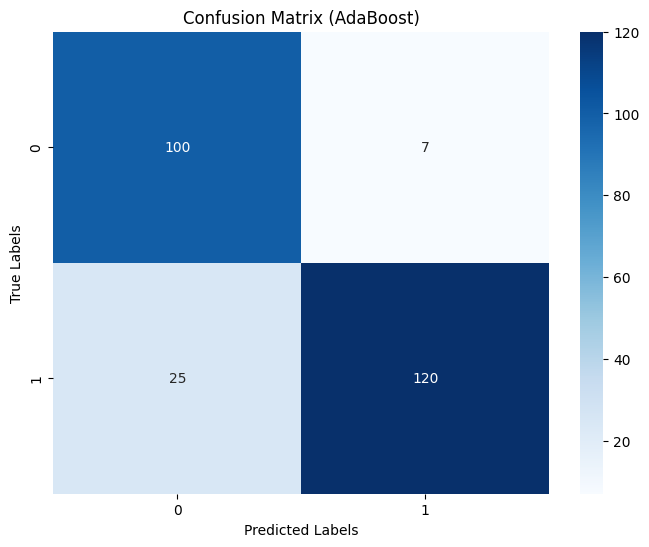

In [48]:
#=======================Calculate the confusion matrix for AdaBoost====================================
cm = confusion_matrix(y_test, y_pred_AB)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()
#==========================================================================================================

<p>
     In the matrix, there are 120 true positives.  In the matrix, there are 120 true positives.  In the matrix, there are 120 true positives.  In the matrix, there are 25 false negatives.
   </p>

In [18]:
#==================Predictor Variables=====================================
X = dataset[['Age','EGFR', 'PTEN', 'NOTCH1', 'PIK3R1', 'CIC', 'IDH2', 'IDH1']]
#X = dataset.drop(['Grade','Age_in_years'], axis = 1)
#===================Output Variable========================================
Y = dataset['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

In [21]:
train_set = [0.70, 0.50, 0.1, 0.05]

In [22]:
#=====================Logistic Regression Model with different training sets================
lr_pred_ls = []
for elm in train_set:
    clf_LR = LogisticRegression(solver='lbfgs', max_iter=1000)
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # Fitting the classifier to the training data
    clf_LR.fit(X_t, y_t)
    #End Time
    end_time = time.time()
    # Making predictions on the testing data
    y_pred_LR = clf_LR.predict(X_test)
    lr_pred_ls.append(y_pred_LR)
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_LR)
    # Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score(Logistic Regression Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (Logistic Regression model) with {elm*100}% training records is {execution_time} seconds \n')

Accuracy score(Logistic Regression Model): 0.873015873015873 with 70.0% training records
Execution Time (Logistic Regression model) with 70.0% training records is 0.01893758773803711 seconds 

Accuracy score(Logistic Regression Model): 0.876984126984127 with 50.0% training records
Execution Time (Logistic Regression model) with 50.0% training records is 0.010347604751586914 seconds 

Accuracy score(Logistic Regression Model): 0.873015873015873 with 10.0% training records
Execution Time (Logistic Regression model) with 10.0% training records is 0.00797271728515625 seconds 

Accuracy score(Logistic Regression Model): 0.8531746031746031 with 5.0% training records
Execution Time (Logistic Regression model) with 5.0% training records is 0.005764007568359375 seconds 



In [23]:
count = 0

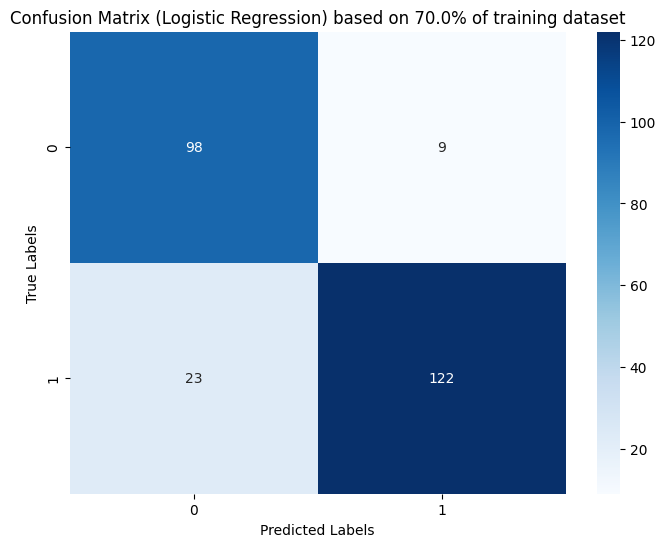

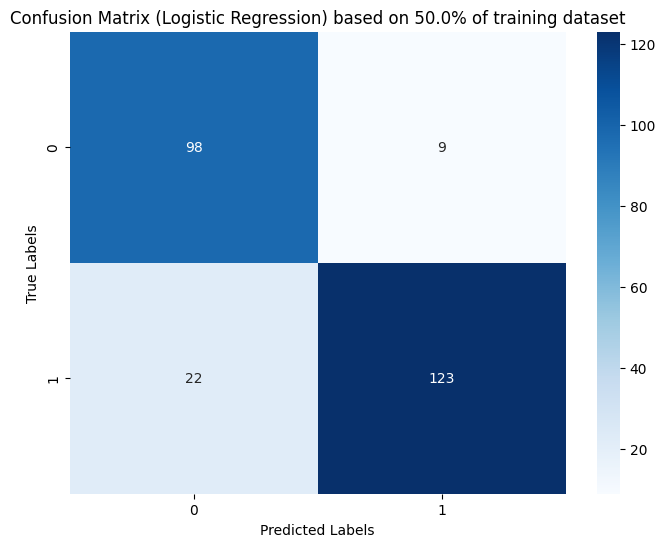

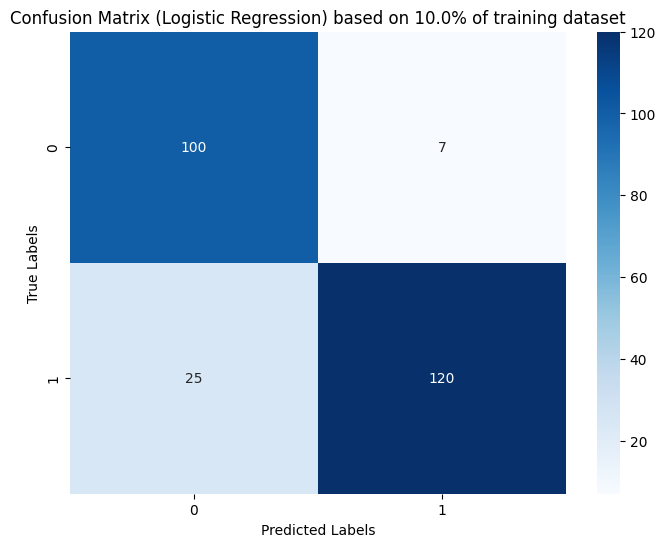

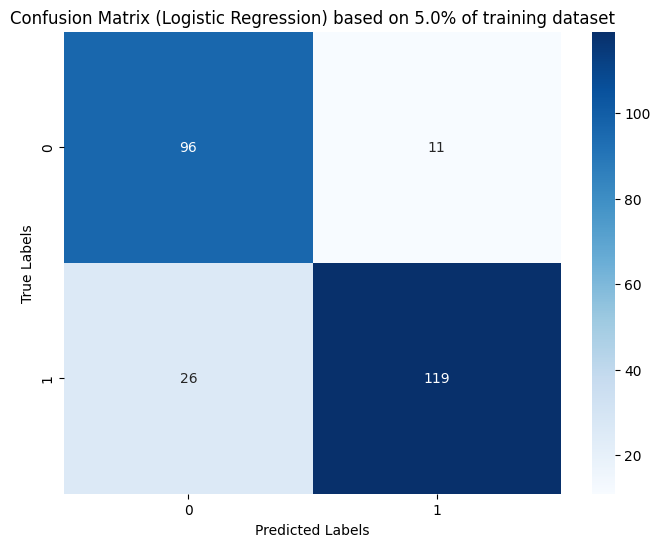

In [24]:
#=======================Calculate the confusion matrix for Logistic Regression Model====================================
for pred in lr_pred_ls:
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (Logistic Regression) based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.show()
#==========================================================================================================

In [25]:
count = 0

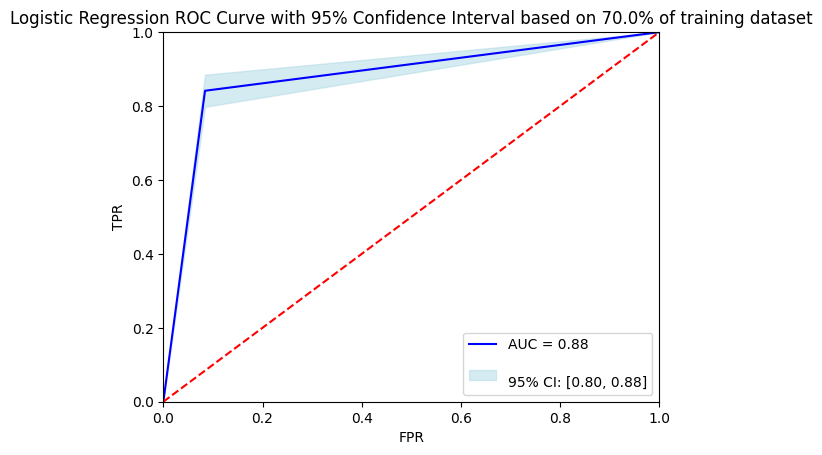

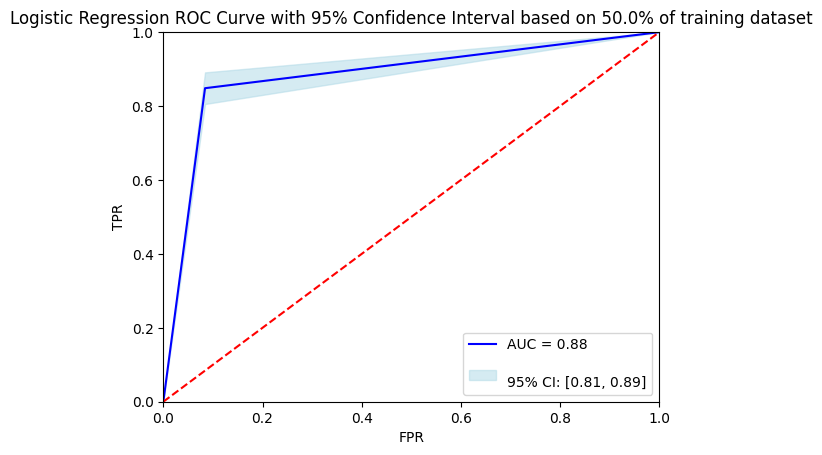

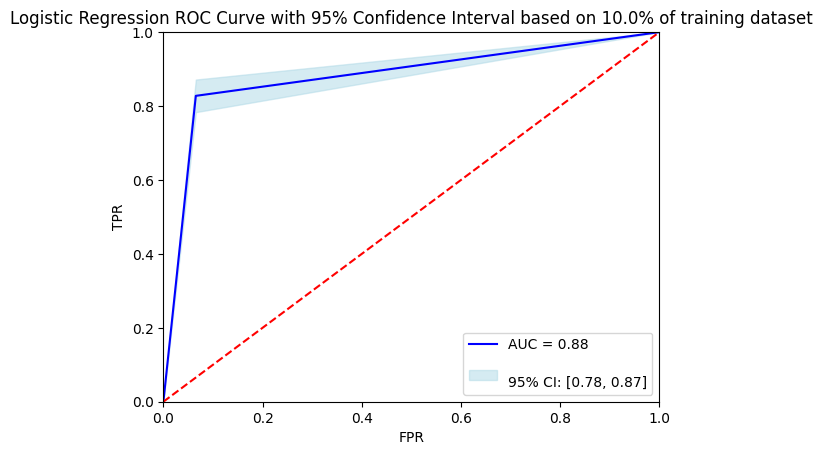

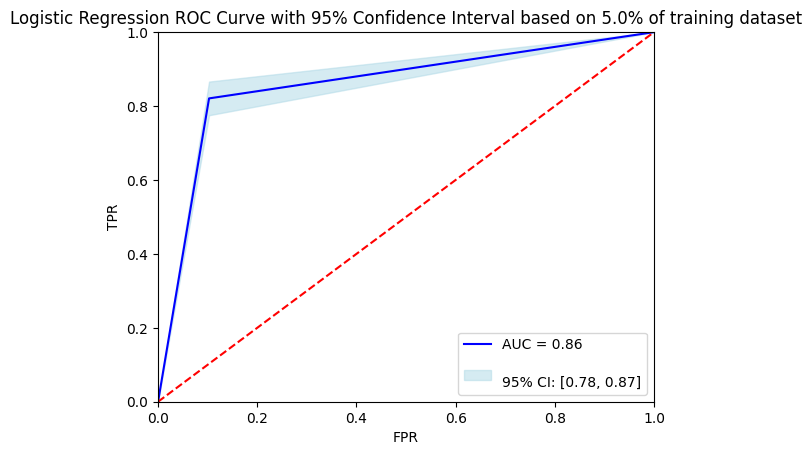

In [27]:
#=================Plotting ROC curve based on Logistic Regression====================(By Abhishek)
for pred in lr_pred_ls:
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), y_test.size, where=(y_test.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Logistic Regression ROC Curve with 95% Confidence Interval based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.legend(loc="lower right")
    plt.show()
#====================================================================================================

In [29]:
#=====================Random Forest Model with different training sets=====================
from sklearn.ensemble import RandomForestClassifier
rf_pred_ls = []
for elm in train_set:
    clf_RF = RandomForestClassifier(n_estimators = 300, max_depth = 10,  min_samples_split = 10)
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # Fitting the classifier to the training data
    clf_RF.fit(X_t, y_t)
    #End Time
    end_time = time.time()
    # Making predictions on the testing data
    y_pred_RF = clf_RF.predict(X_test)
    rf_pred_ls.append(y_pred_RF)
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_RF)
    # Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score(Random Forest Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (Random Forest model) with {elm*100}% training records is {execution_time} seconds \n')
#=======================================================================================================

Accuracy score(Random Forest Model): 0.873015873015873 with 70.0% training records
Execution Time (Random Forest model) with 70.0% training records is 0.48931169509887695 seconds 

Accuracy score(Random Forest Model): 0.8650793650793651 with 50.0% training records
Execution Time (Random Forest model) with 50.0% training records is 0.4277195930480957 seconds 

Accuracy score(Random Forest Model): 0.8650793650793651 with 10.0% training records
Execution Time (Random Forest model) with 10.0% training records is 0.35808849334716797 seconds 

Accuracy score(Random Forest Model): 0.8531746031746031 with 5.0% training records
Execution Time (Random Forest model) with 5.0% training records is 0.35871362686157227 seconds 



In [30]:
count = 0

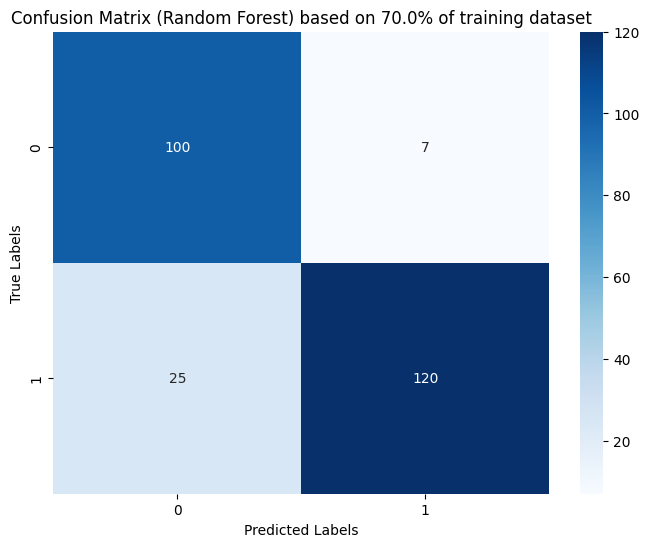

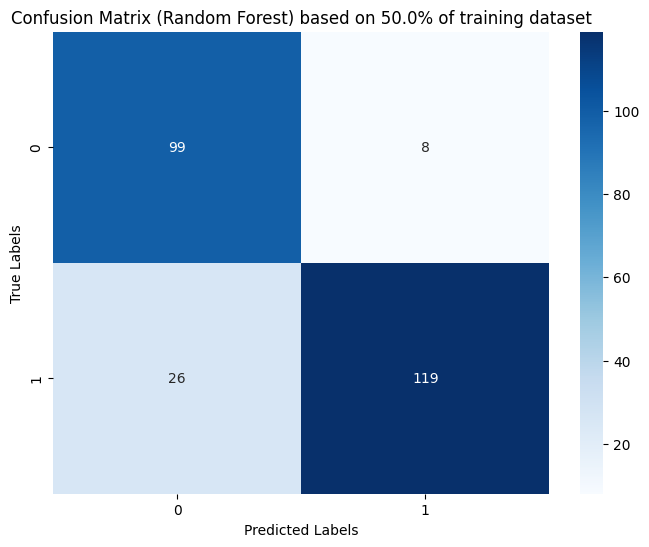

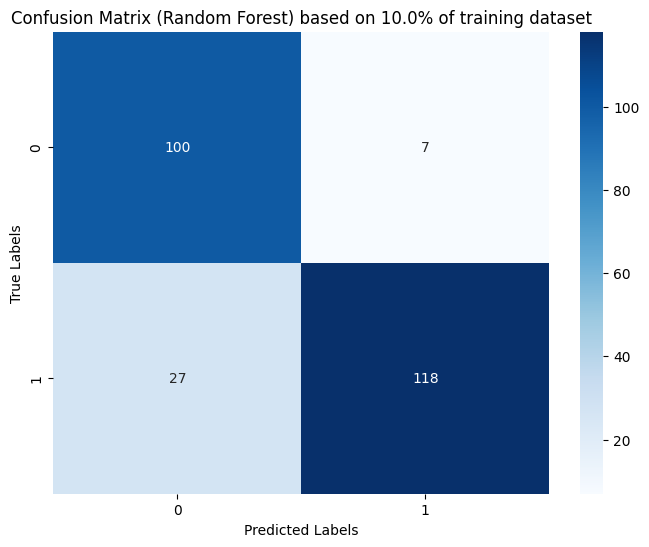

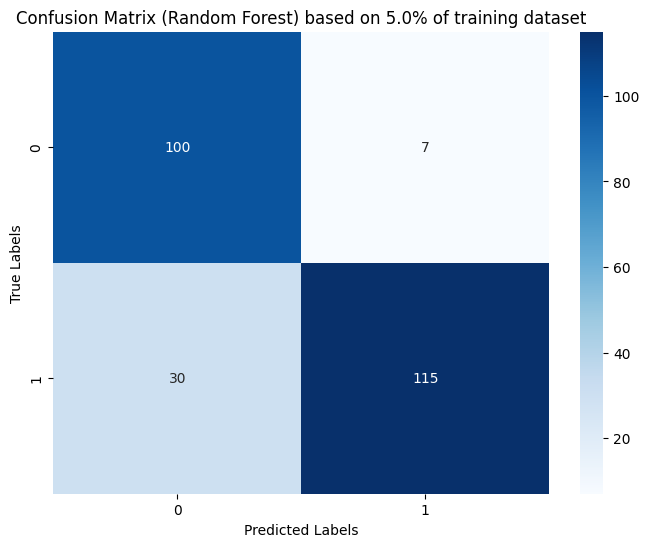

In [31]:
#=======================Calculate the confusion matrix for Random Forest Model====================================
for pred in rf_pred_ls:
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (Random Forest) based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.show()
#==========================================================================================================

In [32]:
count = 0

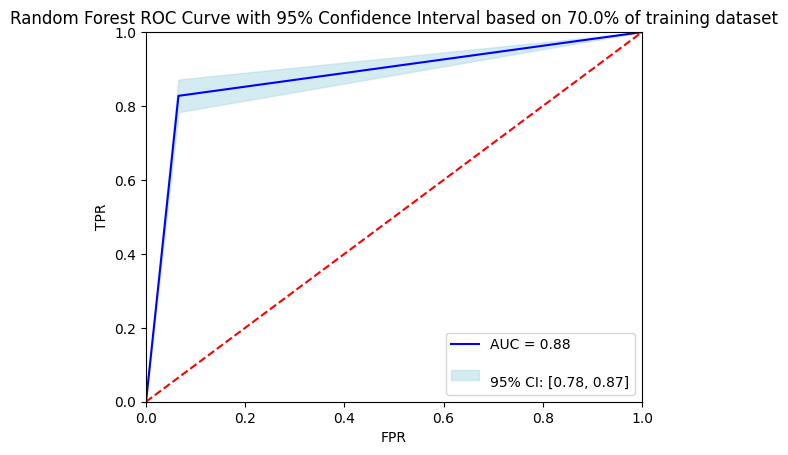

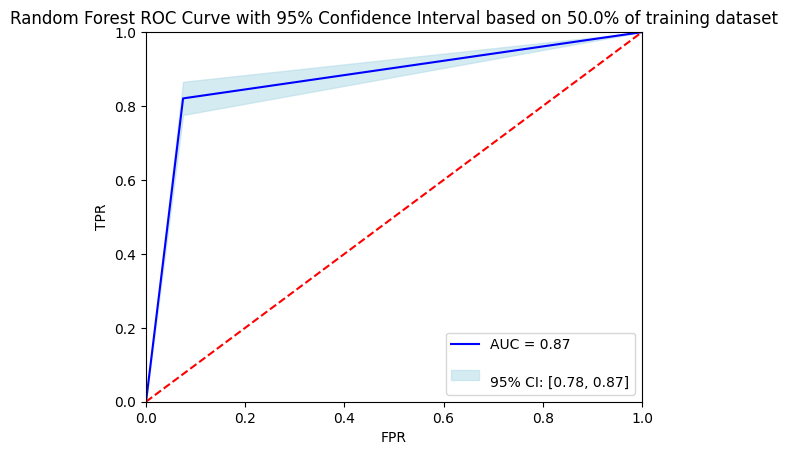

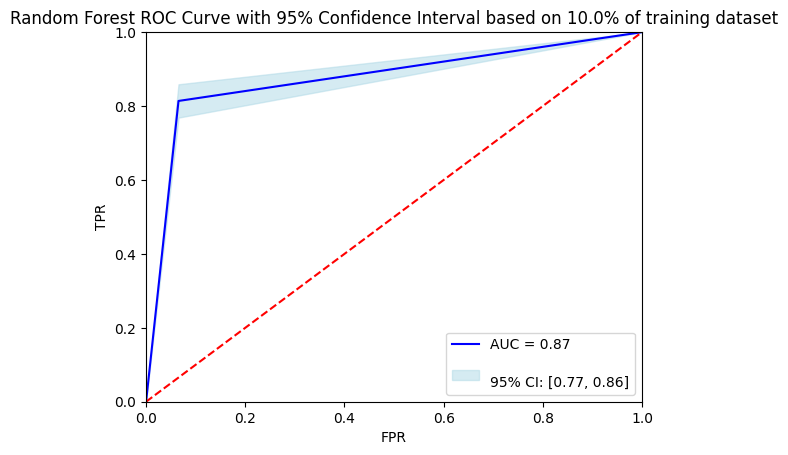

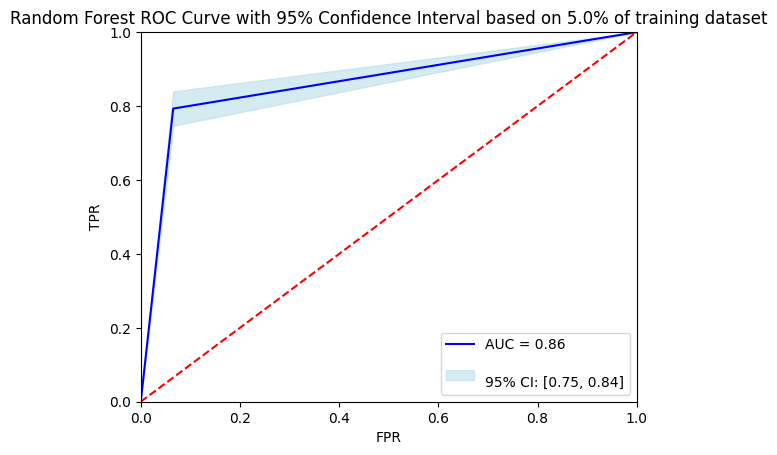

In [33]:
#=================Plotting ROC curve based on Random Forest====================(By Abhishek)
for pred in rf_pred_ls:
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), y_test.size, where=(y_test.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Random Forest ROC Curve with 95% Confidence Interval based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.legend(loc="lower right")
    plt.show()
#=====================================================================================================

In [35]:
#=====================Support Vector Machine Model with different training sets=====================
from sklearn.svm import SVC
svm_pred_ls = []
for elm in train_set:
    clf_SVM = SVC(kernel='sigmoid', probability=True, C = 100, gamma='auto')
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # Fitting the classifier to the training data
    clf_SVM.fit(X_t, y_t)
    #End Time
    end_time = time.time()
    # Making predictions on the testing data
    y_pred_SVM = clf_SVM.predict(X_test)
    svm_pred_ls.append(y_pred_SVM)
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_SVM)
    # Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score(Support Vector Machine Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (Support Vectior Machine Model) with {elm*100}% training records is {execution_time} seconds \n')

Accuracy score(Support Vector Machine Model): 0.8690476190476191 with 70.0% training records
Execution Time (Support Vectior Machine Model) with 70.0% training records is 0.07272815704345703 seconds 

Accuracy score(Support Vector Machine Model): 0.8571428571428571 with 50.0% training records
Execution Time (Support Vectior Machine Model) with 50.0% training records is 0.027248859405517578 seconds 

Accuracy score(Support Vector Machine Model): 0.8650793650793651 with 10.0% training records
Execution Time (Support Vectior Machine Model) with 10.0% training records is 0.0038433074951171875 seconds 

Accuracy score(Support Vector Machine Model): 0.8531746031746031 with 5.0% training records
Execution Time (Support Vectior Machine Model) with 5.0% training records is 0.002678394317626953 seconds 



In [36]:
count = 0

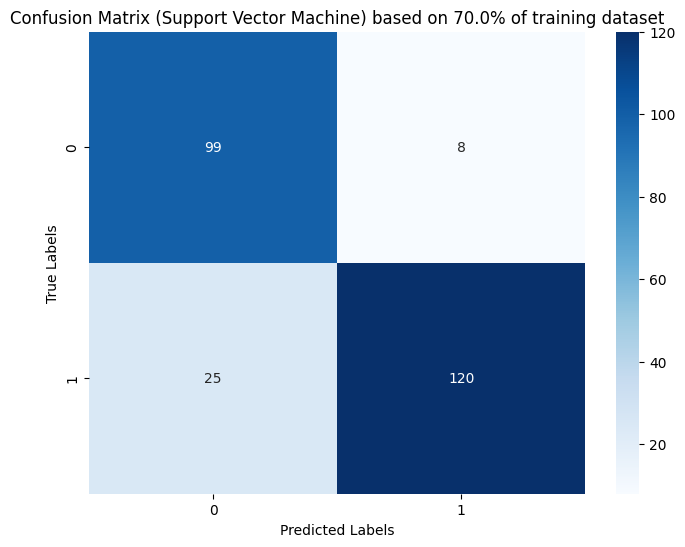

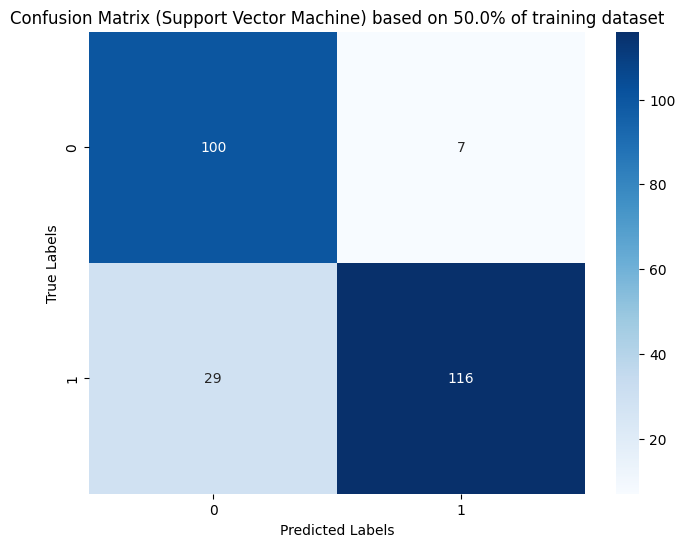

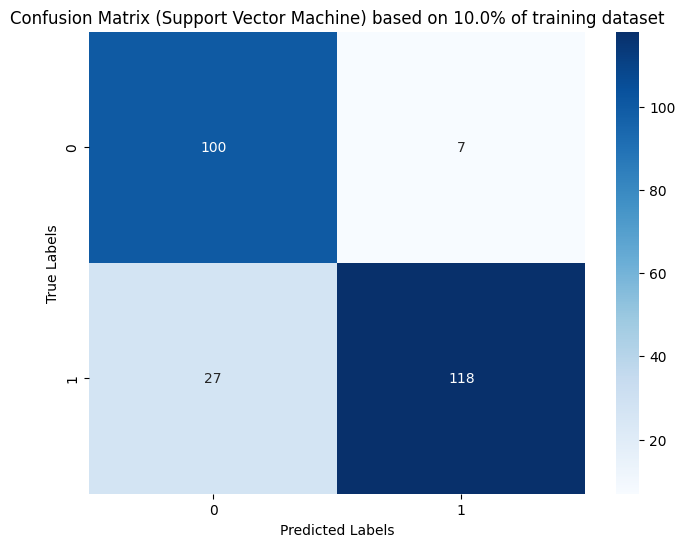

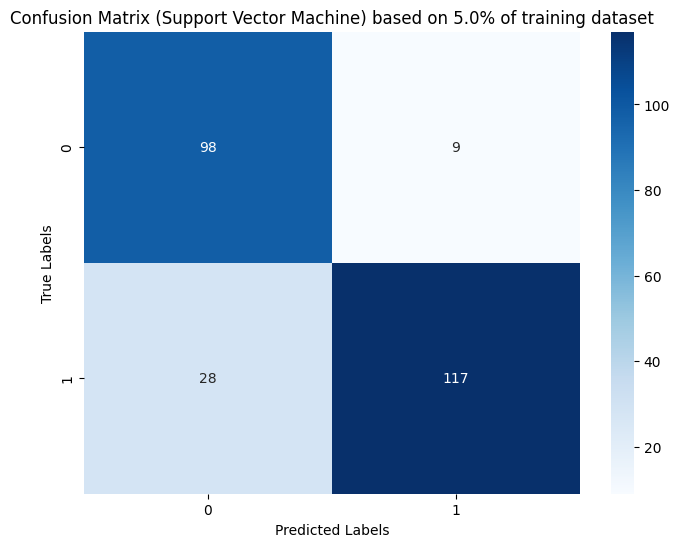

In [37]:
#=======================Calculate the confusion matrix for Support Vector Machine Model====================================
for pred in svm_pred_ls:
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (Support Vector Machine) based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.show()
#==========================================================================================================

In [38]:
count = 0

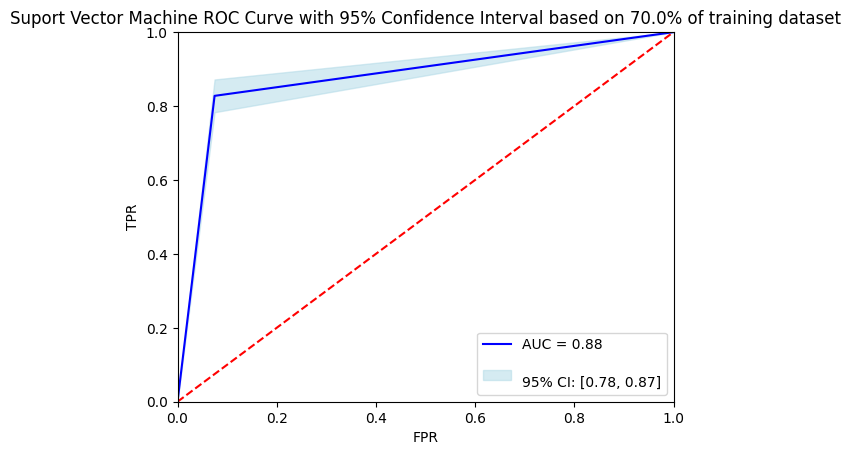

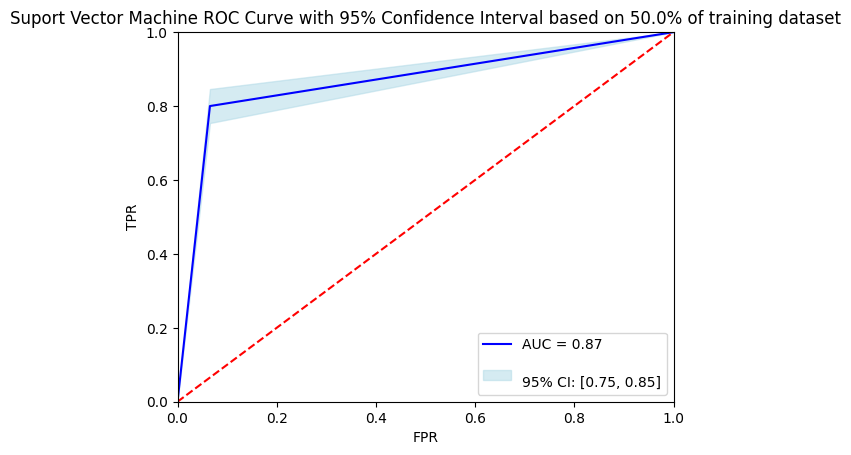

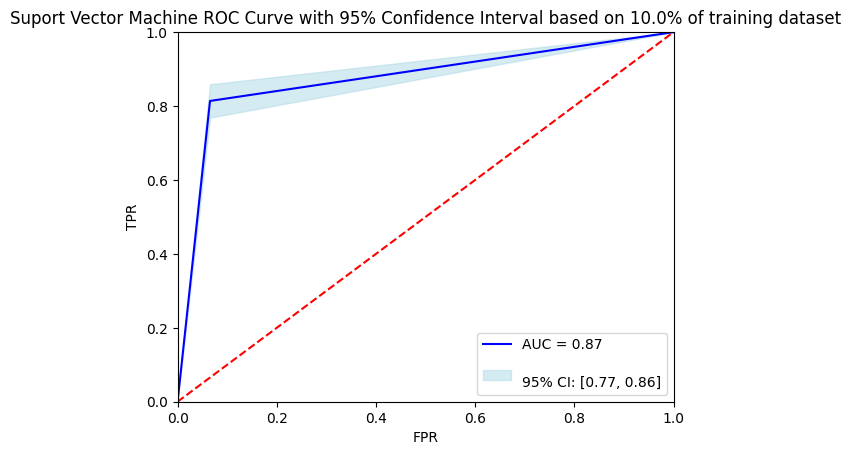

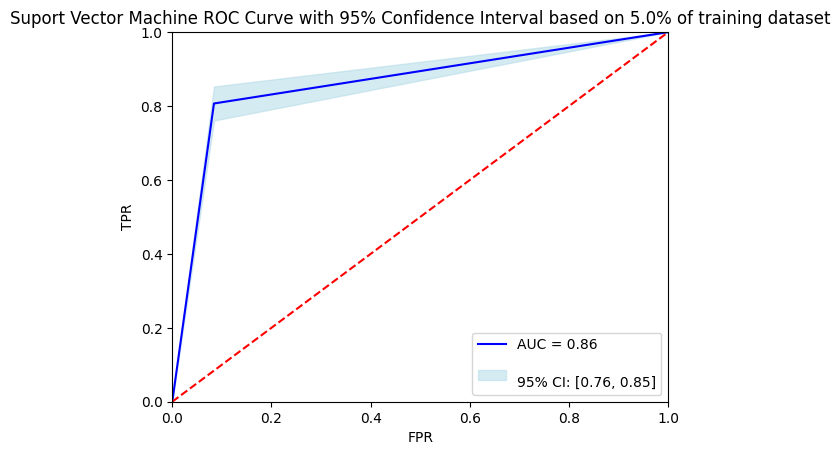

In [39]:
#=================Plotting ROC curve based on Suport Vector Machine====================(By Abhishek)
for pred in svm_pred_ls:
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), y_test.size, where=(y_test.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Suport Vector Machine ROC Curve with 95% Confidence Interval based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.legend(loc="lower right")
    plt.show()
#=====================================================================================================

In [24]:
train_set = [0.70, 0.50, 0.1, 0.05]

In [40]:
from collections.abc import Sequence, Mapping

In [58]:
#=====================================QSVC Model==========================================
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.utils import algorithm_globals
from sklearn.preprocessing import MinMaxScaler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC

algorithm_globals.random_seed = 123
features = MinMaxScaler().fit_transform(X)

labels = Y
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.7, random_state=algorithm_globals.random_seed
)
num_features = features.shape[1]

adhoc_feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1, entanglement="full")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map, enforce_psd = False)
# qsvc = QSVC(quantum_kernel=adhoc_kernel)
pred_qsvctask1 = []
for elm in train_set:
    qsvc = QSVC(quantum_kernel=adhoc_kernel)
    X_t, dummy_x, y_t, dummy_y = train_test_split(train_features, train_labels, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # Fitting the classifier to the training data
    qsvc.fit(X_t, y_t)
    #End Time
    end_time = time.time()
    # Making predictions on the testing data
    y_pred_qvsc = qsvc.predict(test_features)
    pred_qsvctask1.append(y_pred_qvsc)
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(test_labels, y_pred_qvsc)
    # Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score of the QSVC Model is {accuracy} with {elm*100}% training records')
    print(f'Execution Time of QSVC Model with {elm*100}% training records is {execution_time} seconds \n')

KeyboardInterrupt: 

In [35]:
count = 0

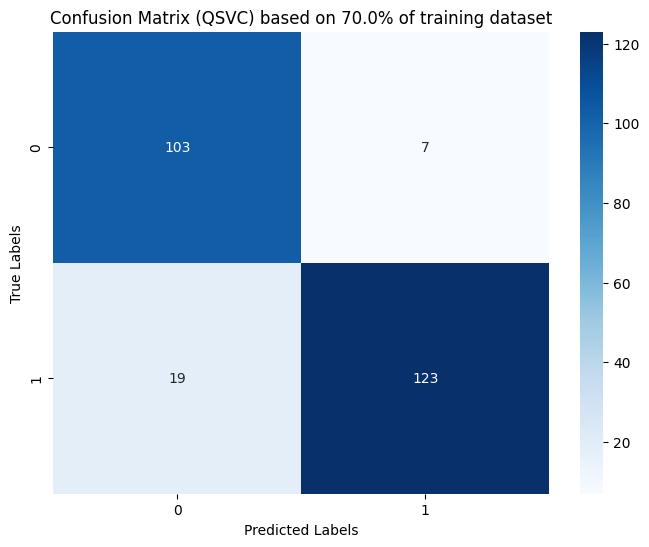

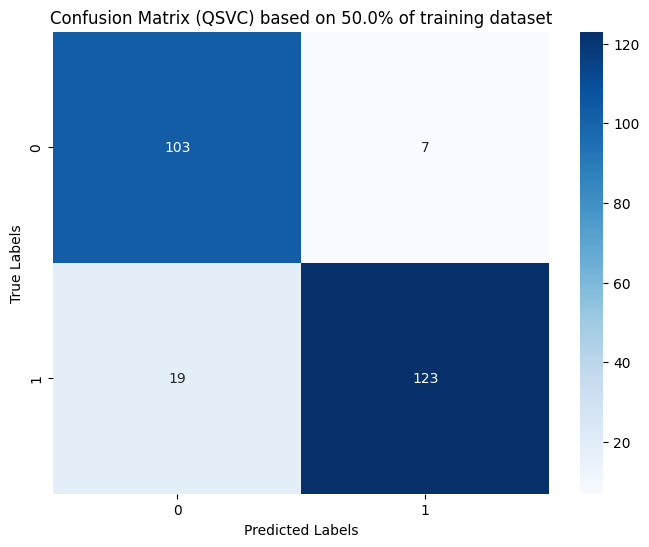

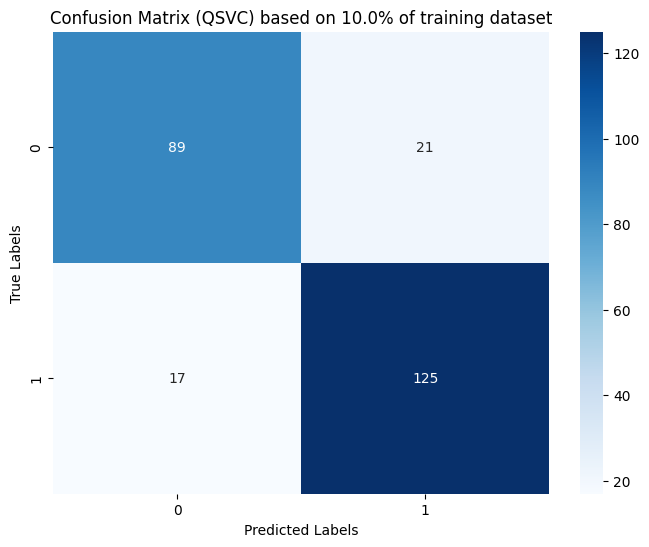

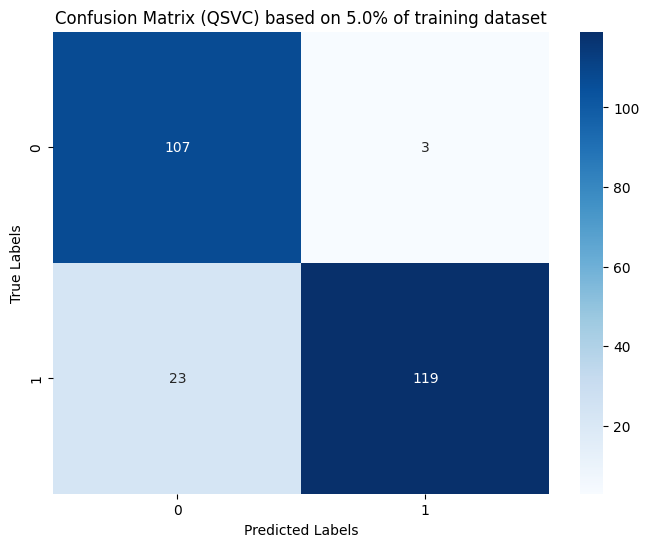

In [36]:
#=======================Calculate the confusion matrix for QSVC Model====================================
for pred in pred_qsvctask1:
    # Calculate the confusion matrix
    cm = confusion_matrix(test_labels, pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (QSVC) based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.show()
#==========================================================================================================

In [33]:
count = 0

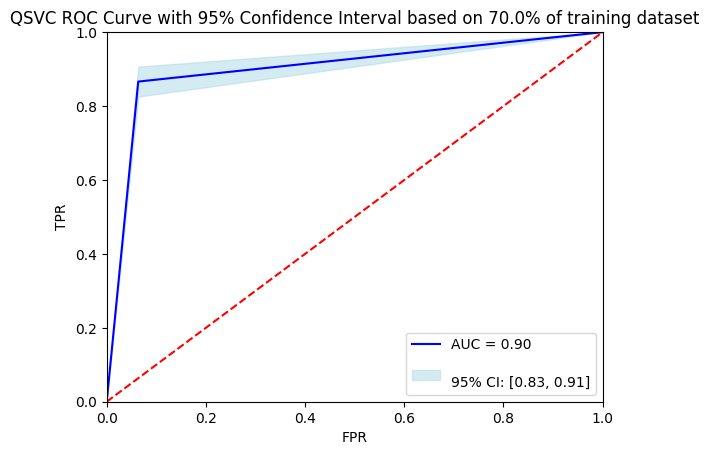

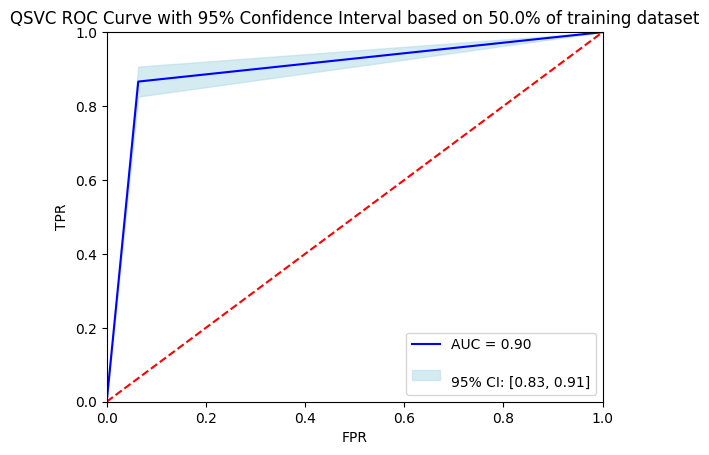

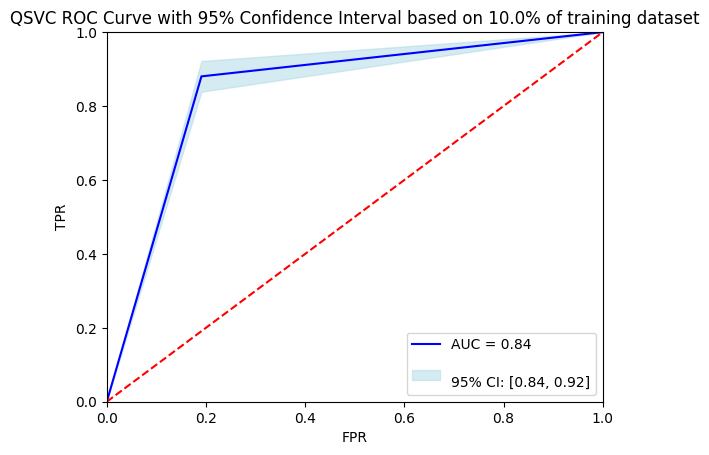

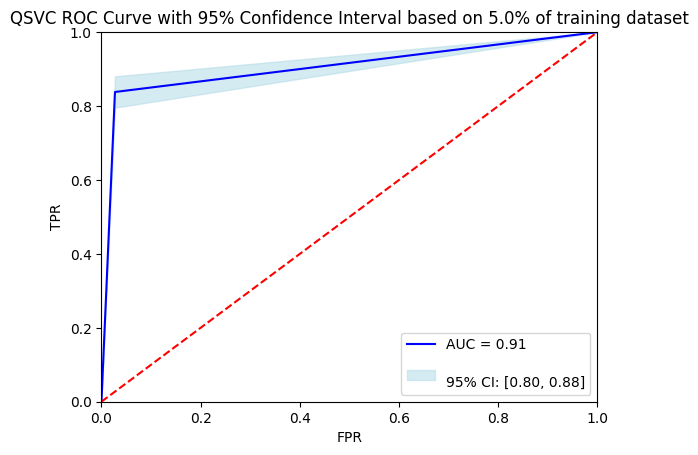

In [34]:
#=================Plotting ROC curve based on QSVC====================(By Abhishek)
from sklearn.metrics import roc_curve, roc_auc_score, auc
for pred in pred_qsvctask1:
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(test_labels, pred)
    roc_auc = auc(fpr, tpr)
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), test_labels.size, where=(test_labels.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'QSVC ROC Curve with 95% Confidence Interval based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.legend(loc="lower right")
    plt.show()
#====================================================================================================

In [42]:
#=====================Vector Quantum Classifier Model with different training sets================
from sklearn.metrics import roc_curve, roc_auc_score, auc
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.utils import algorithm_globals
from sklearn.preprocessing import MinMaxScaler
import qiskit_algorithms.optimizers as op
from qiskit.circuit.library import EfficientSU2, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

algorithm_globals.random_seed = 123
features = MinMaxScaler().fit_transform(X)
labels = Y
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)
num_features = features.shape[1]
adhoc_feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#feature_map.decompose().draw(output="mpl", fold=20)

In [43]:
# ansatz = EfficientSU2(num_qubits=num_features, su2_gates=qc, entanglement = 'full', reps=1)

In [44]:
ansatz = RealAmplitudes(num_features, entanglement='reverse_linear', reps=3)

In [45]:
optimizer = op.COBYLA(maxiter=100)

In [46]:
sampler = Sampler()

In [47]:
vqc = VQC(
    sampler=sampler,
    feature_map=adhoc_feature_map,
    ansatz=ansatz,
    loss = 'cross_entropy',
    optimizer=optimizer
)
#clear objective value history
objective_func_vals = []
pred_vqtask1 = []
for elm in train_set:
    X_t, dummy_x, y_t, dummy_y = train_test_split(train_features, train_labels, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    vqc.fit(X_t, y_t.values)
    #End Time
    end_time = time.time()
    #accuracy = vqc.score(test_features, test_labels.values)
    pred = vqc.predict(test_features)
    accuracy = accuracy_score(test_labels.values, pred)
    pred_vqtask1.append(pred)
    #Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score(VQC Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (VQC model) with {elm*100}% training records is {execution_time} seconds \n')
#======================================VQC=================================================

QiskitMachineLearningError: 'Sampler job failed.'

In [25]:
count = 0

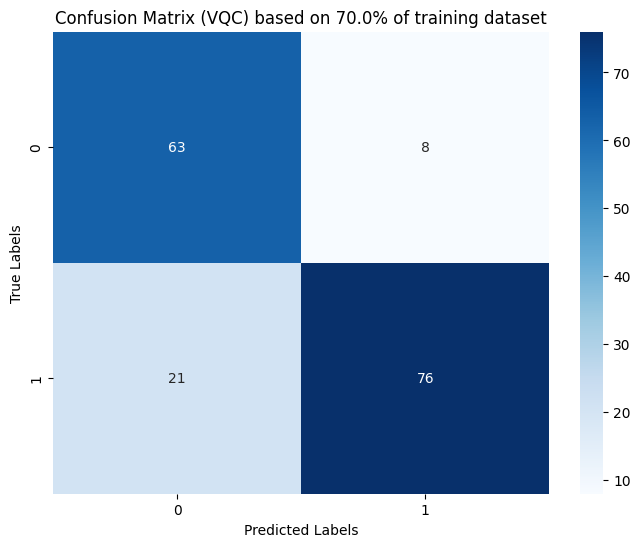

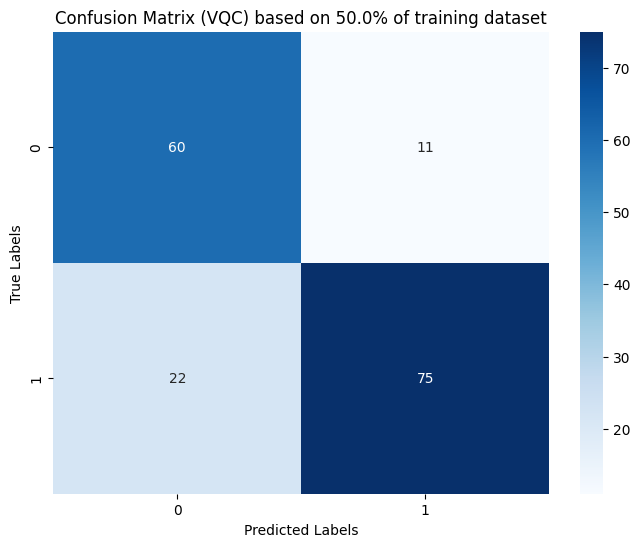

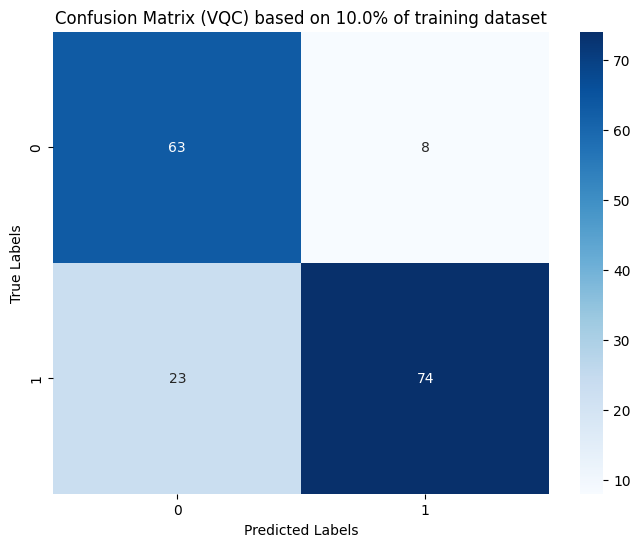

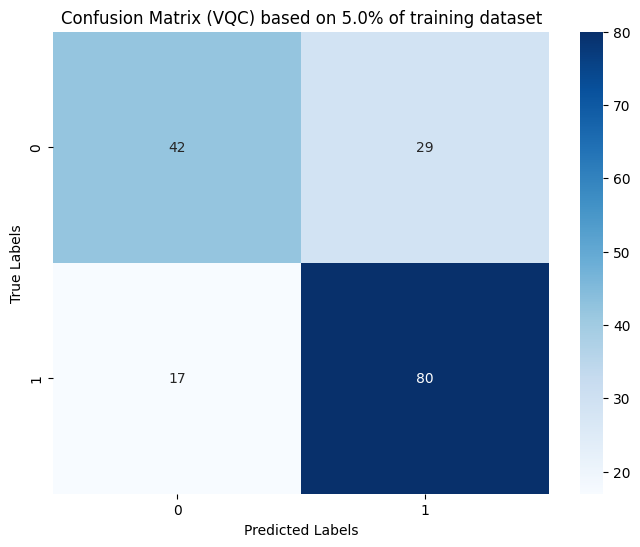

In [26]:
#=======================Calculate the confusion matrix for VQC Model====================================
for pred in pred_vqtask1:
    # Calculate the confusion matrix
    cm = confusion_matrix(test_labels, pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (VQC) based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.show()
#==========================================================================================================

In [27]:
count = 0

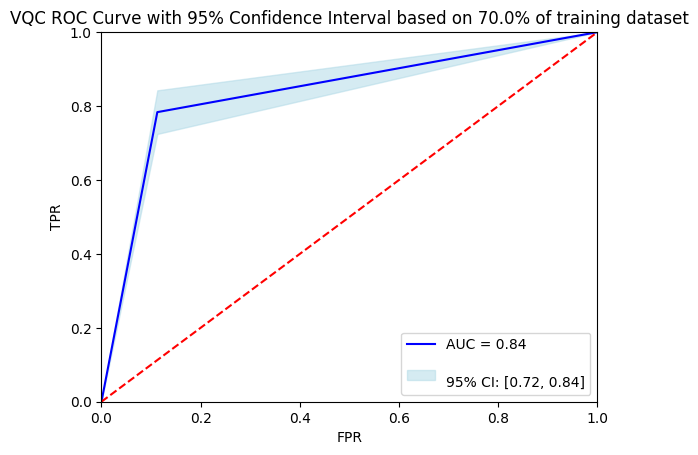

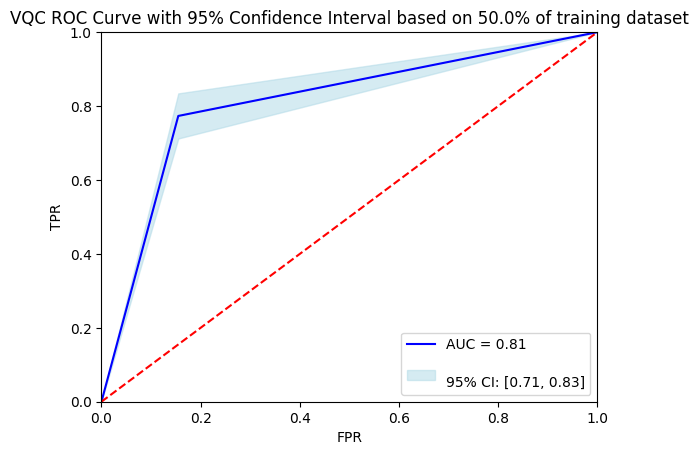

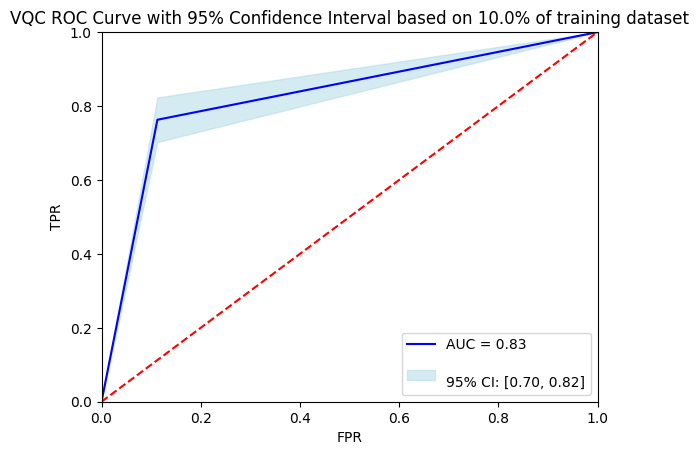

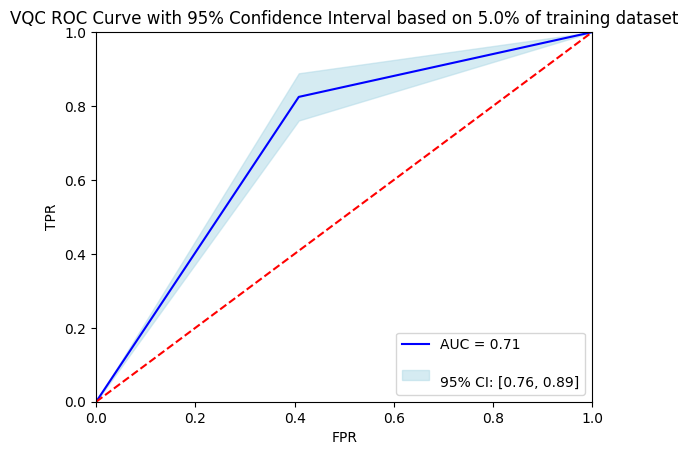

In [28]:
#=================Plotting ROC curve based on VQC====================(By Abhishek)
for pred in pred_vqtask1:
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(test_labels, pred)
    roc_auc = auc(fpr, tpr)
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), test_labels.size, where=(test_labels.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'VQC ROC Curve with 95% Confidence Interval based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.legend(loc="lower right")
    plt.show()
#====================================================================================================

In [29]:
#Number of qubits is equal to the number of features
num_qubits = num_features

#Number of steps performed during the training procedure
tau = 1000

#Regularization parameter
C = 100

In [30]:
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

In [39]:
#=====================Pegasos Quantum Support Vector Classifier=========================
from qiskit_machine_learning.algorithms import PegasosQSVC

pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C ,num_steps=tau)
pred_pqsvc = []
for elm in train_set:
    X_t, dummy_x, y_t, dummy_y = train_test_split(train_features, train_labels, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # training
    pegasos_qsvc.fit(X_t, y_t.values)
    #End Time
    end_time = time.time()
    # testing
    pred = pegasos_qsvc.predict(test_features)
    pred_pqsvc.append(pred)
    pegasos_score = accuracy_score(test_labels.values, pred)
    #Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score (PegasosQSVC Model): {pegasos_score} with {elm*100}%  training records')
    print(f'Execution Time (PegasosQSVC model) with {elm*100}%  training records is {execution_time} seconds \n')

Accuracy score (PegasosQSVC Model): 0.8928571428571429 with 70.0%  training records
Execution Time (PegasosQSVC model) with 70.0%  training records is 692.6701335906982 seconds 

Accuracy score (PegasosQSVC Model): 0.8928571428571429 with 50.0%  training records
Execution Time (PegasosQSVC model) with 50.0%  training records is 532.5372486114502 seconds 

Accuracy score (PegasosQSVC Model): 0.9107142857142857 with 10.0%  training records
Execution Time (PegasosQSVC model) with 10.0%  training records is 226.65405321121216 seconds 

Accuracy score (PegasosQSVC Model): 0.8630952380952381 with 5.0%  training records
Execution Time (PegasosQSVC model) with 5.0%  training records is 128.5850052833557 seconds 



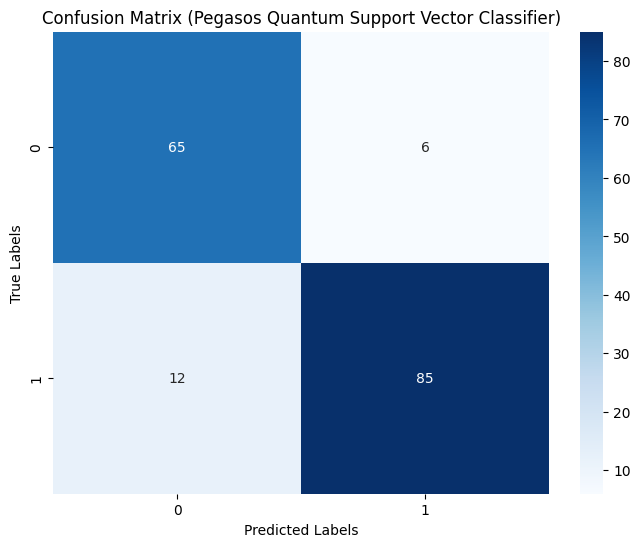

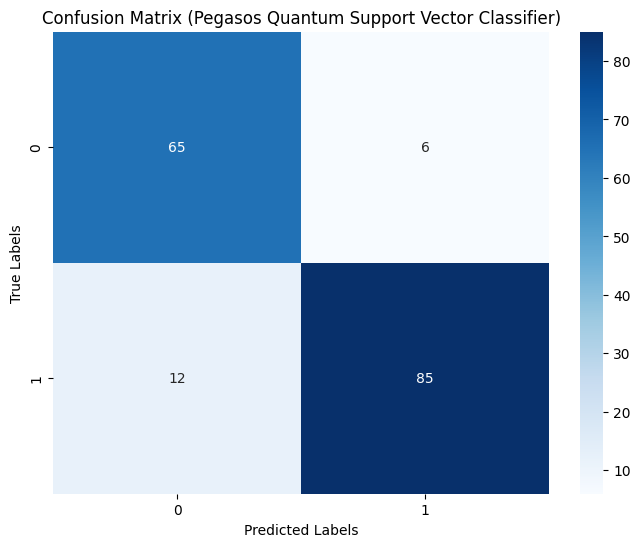

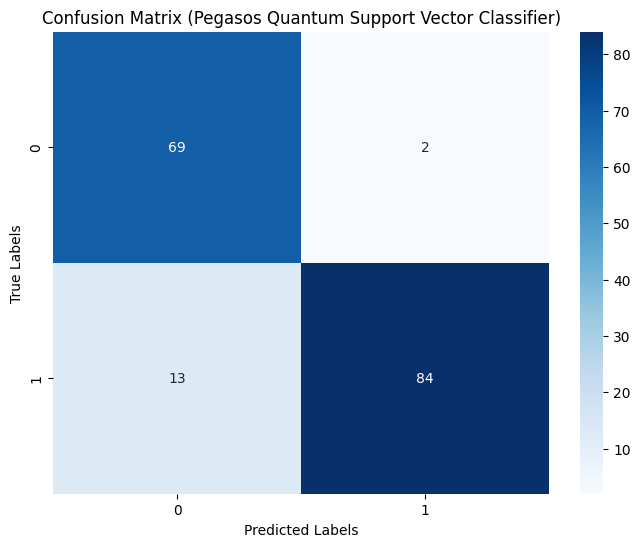

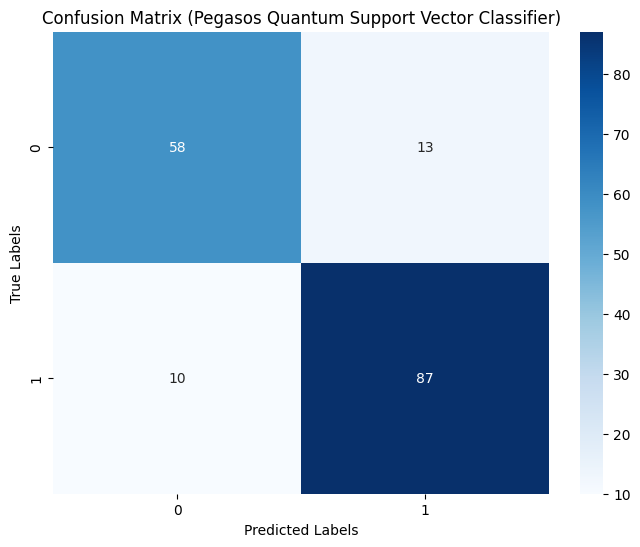

In [43]:
#===========================Calculate the confusion matrix for Pegasos Quantum Support Vector Classifier Model=======
for pred in pred_pqsvc:
    # Calculate the confusion matrix
    cm = confusion_matrix(test_labels, pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix (Pegasos Quantum Support Vector Classifier)')
    plt.show()
#==========================================================================================================

In [45]:
count = 0

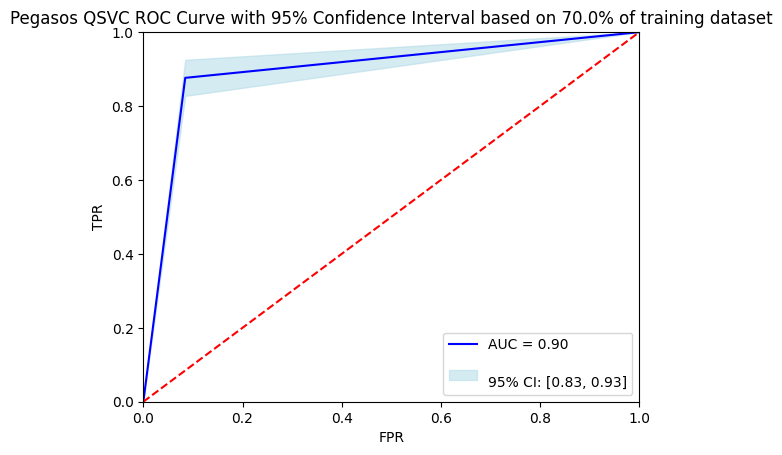

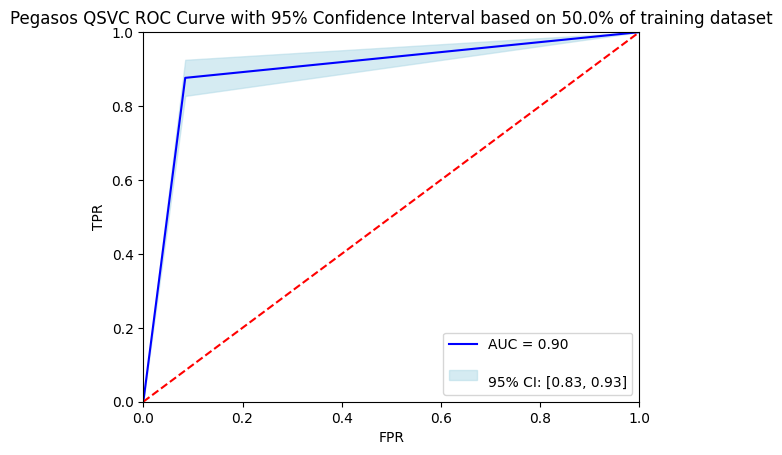

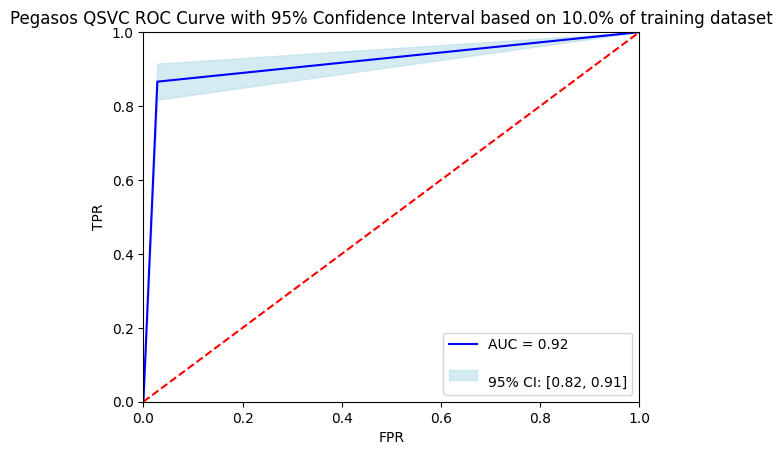

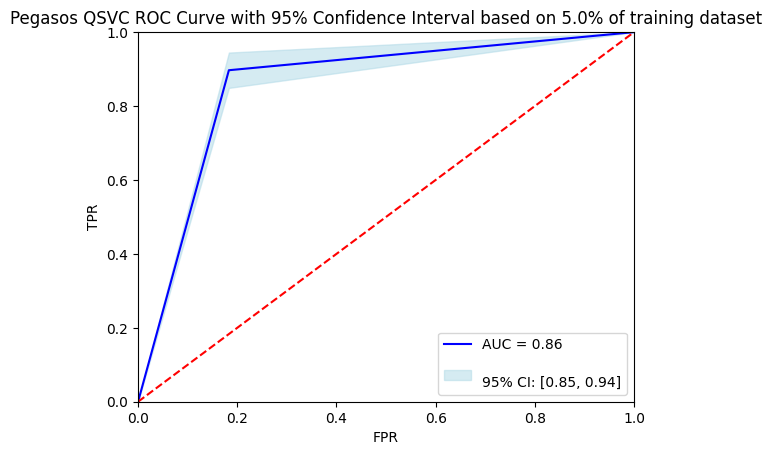

In [46]:
#=================Plotting ROC curve based on Pegasos Quantum Support Vector Classifier model====================(By Abhishek)
for pred in pred_pqsvc:
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(test_labels, pred)
    roc_auc = auc(fpr, tpr)
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), test_labels.size, where=(test_labels.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Pegasos QSVC ROC Curve with 95% Confidence Interval based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.legend(loc="lower right")
    plt.show()
#====================================================================================================

# <center><h1><b>Conclusion</b></h1></center>
<ul>
    <li>
        <p>The performance of Logistic Regression, Random Forest, and Support Vector Machine models trained with varying percentages of training records. Across the models, accuracy scores range from 0.8413 to 0.8730, while execution times vary between 0.0023 to 0.4177 seconds. The Logistic Regression model achieves the highest accuracy score of 0.8730 with 50.0% training records, while the Support Vector Machine model demonstrates the fastest execution times, ranging from 0.0023 to 0.0361 seconds. Considering both accuracy and execution time, the optimal choice depends on the priority between accuracy and efficiency. The Logistic Regression model with 50.0% training records is ideal for maximizing accuracy, whereas the Support Vector Machine model offers a balance between decent accuracy and significantly faster execution times, making it preferable for efficiency-focused applications.
        </p>
    </li>
    <li>
        <p>
            The observations based on confusion matrices show that Logistic Regression exhibits consistent performance across varied training dataset sizes, maintaining high true positives while minimizing false positives and negatives. Random Forest also displays consistent performance with a balanced ratio of true positives to false positives/negatives. Conversely, Support Vector Machine (SVM) demonstrates performance fluctuations based on dataset size, generally yielding higher false positives and negatives compared to Logistic Regression and Random Forest. Considering these observations, Logistic Regression emerges as a favorable choice owing to its stable performance across different dataset sizes. Nonetheless, without clarifying the relative importance of metrics, such as the cost of false positives versus false negatives, a conclusive decision remains challenging.
        </p>
    </li>
    <li>
        <p>
            In order to ascertain the optimal classification model using the ROC Curve data provided, it is essential to examine the AUC (Area Under the Curve) values across varying sizes of training datasets for each model. The Support Vector Machine (SVM), Random Forest, and Logistic Regression models were evaluated at different proportions of the training data, with corresponding AUC values documented accordingly. Despite minor fluctuations, the AUC values for each model exhibit a degree of consistency across different dataset sizes. Notably, Logistic Regression consistently demonstrates superior performance, achieving the highest AUC values of 0.88 when trained on both 70% and 50% of the dataset. Therefore, based on this analysis, Logistic Regression emerges as the most effective classification model for this particular task.
        </p>
    </li>
    <li>
        <p>
           The provided accuracy information for three quantum classification models, QSVC, VQC, and PegasosQSVC, reveals distinct performance trends across various percentages of training records. The QSVC model maintains consistent accuracy scores between 0.849 and 0.897, with notable increases in execution time for smaller training sets. Conversely, the VQC model's accuracy ranges from 0.726 to 0.827, showing a decreasing trend with reduced training records and moderate increases in execution time. The PegasosQSVC model achieves accuracy scores between 0.863 and 0.911, demonstrating stable performance and slight accuracy improvements with smaller training sets, alongside moderate execution time increases. Overall, the PegasosQSVC model emerges as the most favorable choice due to its higher accuracy and relatively stable performance, balanced with reasonable execution times, compared to the QSVC and VQC models across different training set sizes.
        </p>
    </li>
    <li>
        <p>
            To determine the most effective classification model, the performance of three classifiers—QSVC, VQC, and Pegasos QSVC—was assessed across varying proportions of the training dataset, focusing on accuracy, precision, recall, and F1-score metrics. QSVC consistently demonstrated high accuracy and well-balanced precision-recall trade-offs across different dataset sizes, with the 5% training dataset yielding slightly superior performance, marked by increased true positives and reduced false negatives. VQC displayed moderate performance, with its 70% trained model exhibiting marginally better precision and recall. Pegasos QSVC also maintained consistent performance, with its 10% trained model standing out for slightly elevated precision and recall rates. Overall, considering the harmony between precision and recall alongside consistent performance, the QSVC model, particularly when trained on 5% of the dataset, emerged as the most optimal choice among the classifiers.
        </p>
    </li>
    <li>
        <p>
            Based on the provided ROC Curve information, the conclusion can be drawn that the Pegasos QSVC trained on 10% of the training dataset is the best classification model among the options provided. This conclusion is based on the highest Area Under the Curve (AUC) value achieved by this model (AUC = 0.92), indicating superior performance in distinguishing between classes compared to the other models.
        </p>
    </li>
    </ul>

# <center><h1><b>References</b></h1></center>
<ul><li><p>Quantum machine learning algorithms (qiskit_machine_learning.algorithms) - Qiskit Machine Learning 0.7.0. (n.d.).<a href='
https://qiskit.org/ecosystem/machine-learning/apidocs/qiskit_machine_learning.algorithms.html#module-qiskit_machine_learning.algorithm'>Qiskit Machine Learning URL </a>s</p></li>
</ul>